In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from pathlib import Path

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# configure df options
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 10)
#pd.set_option('display.width', 20)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

%matplotlib inline

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [3]:
# where all CSV files are
input_path = '../../dataset/csv'

In [4]:
def read_csv(filename):
    return pd.read_csv(filename, usecols=['code', 'date', 'min', 'max'], index_col='date', parse_dates=['date'])

### Merge all measurements from multiple CSV files into one dataframe

In [5]:
path = Path(input_path)

for index, file in enumerate(path.rglob('*.csv')):
    filename = f'{input_path}/{file}'
    
    if index == 0:
        df = read_csv(filename)
        count = df.shape[0]
    else:
        temp = read_csv(filename)
        count = temp.shape[0]
        
        df = pd.concat([df, temp])
                        
    print(f'{index + 1}. Processing {count} rows from file: {filename}')

1. Processing 182 rows from file: ../../dataset/csv/../../dataset/csv/type1/2016-GIAOHOA.csv
2. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type1/2018-THANHTHOIA.csv
3. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2002-LOCTHUAN.csv
4. Processing 182 rows from file: ../../dataset/csv/../../dataset/csv/type1/2008-SONDOC.csv
5. Processing 182 rows from file: ../../dataset/csv/../../dataset/csv/type1/2004-BENTRAI.csv
6. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2003-LOCTHUAN.csv
7. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2005-BENTRAI.csv
8. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2006-BENTRAI.csv
9. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2005-BINHDAI.csv
10. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2016-MYHOA.csv
11. Processing 181 rows from file: ../../dataset/csv/../../dataset/

In [6]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2015-02-09', '2015-02-11', '2015-02-12', '2015-02-13',
               '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-22',
               '2015-02-23', '2015-02-24'],
              dtype='datetime64[ns]', name='date', length=15106, freq=None)

In [7]:
# set DatetimeIndex to daily frequence: DOES NOT WORK, IT EMPTIES THE DATAFRAME
#df = df.asfreq(pd.infer_freq(df.index)) #  df = df.asfreq('D')
#df.index

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15106 entries, 2016-01-01 to 2015-02-24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    15106 non-null  object 
 1   min     15010 non-null  float64
 2   max     15106 non-null  float64
dtypes: float64(2), object(1)
memory usage: 472.1+ KB


In [9]:
# first measurement date
df.index.min()

Timestamp('2002-01-01 00:00:00')

In [10]:
# last measurement date
df.index.max()

Timestamp('2018-05-31 00:00:00')

In [11]:
df['code'].unique()

array(['GIAOHOA', 'THANHTHOIA', 'LOCTHUAN', 'SONDOC', 'BENTRAI',
       'BINHDAI', 'MYHOA', 'ANTHUAN', 'MOCAY', 'TIENTHUY', 'MYTHANH',
       'PHUOCLONG', 'CAMSON', 'CAIMIT', 'SONPHU', 'HUNGKHANHTRUNGB',
       'TANTHIENG', 'TICHTHIEN', 'CONGNANGAM', 'VUNGLIEM', 'TRACU',
       'VANGQUOITAY', 'MYVAN', 'BENCHUA', 'LANGTHE', 'RACHRUM', 'CAIHOP',
       'HUONGMY'], dtype=object)

In [12]:
# how stations are distributed in the dataset
datapoint_df = df['code'].value_counts()

datapoint_df

SONDOC             2271
LOCTHUAN           2154
BENTRAI            2108
ANTHUAN            2108
BINHDAI            2108
MYHOA               308
TANTHIENG           302
MOCAY               302
TICHTHIEN           302
TIENTHUY            302
PHUOCLONG           302
GIAOHOA             182
CAIHOP              151
MYVAN               151
VUNGLIEM            151
RACHRUM             151
THANHTHOIA          151
HUNGKHANHTRUNGB     151
CONGNANGAM          151
LANGTHE             151
MYTHANH             151
TRACU               151
CAIMIT              151
BENCHUA             151
CAMSON              151
SONPHU              151
VANGQUOITAY         151
HUONGMY              92
Name: code, dtype: int64

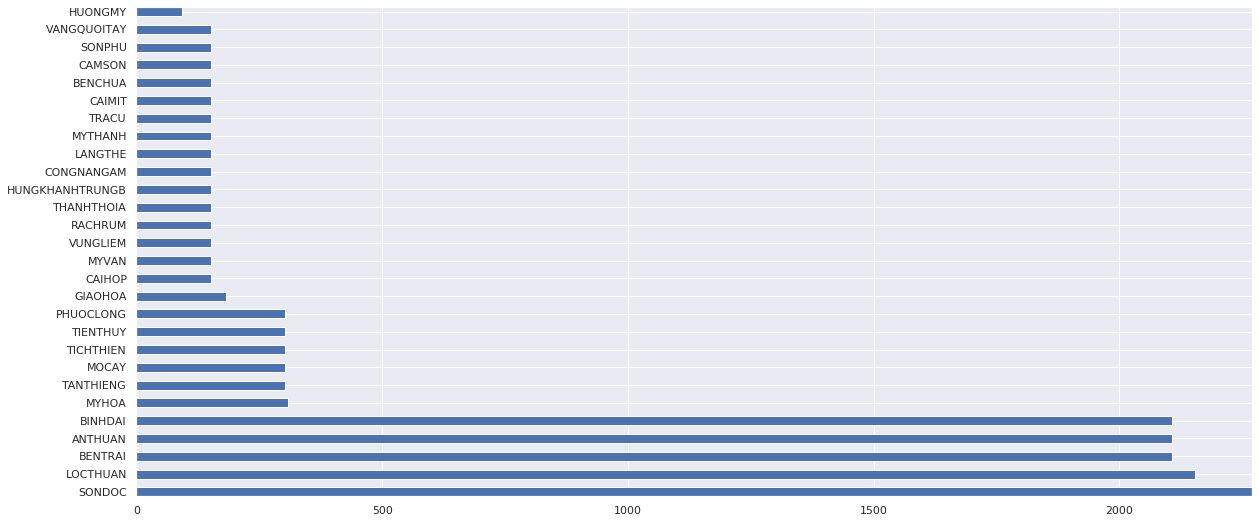

In [13]:
# chart on how stations are distributed in the dataset
datapoint_df.plot.barh(figsize=(20, 9)).autoscale(enable=True, axis='both', tight=True)

In [14]:
# sort by date index
df.sort_index(inplace=True)

df.head(10)

code     min     max
date                                
2002-01-01   ANTHUAN 3.50000 6.00000
2002-01-01  LOCTHUAN 0.00000 0.00000
2002-01-01    SONDOC 0.10000 0.30000
2002-01-01   BENTRAI 0.20000 1.00000
2002-01-01   BINHDAI 0.50000 2.00000
2002-01-02   ANTHUAN 3.00000 5.50000
2002-01-02  LOCTHUAN 0.00000 0.00000
2002-01-02   BINHDAI 1.00000 3.00000
2002-01-02   BENTRAI 0.10000 1.00000
2002-01-02    SONDOC 0.10000 0.40000

### Basic visualization

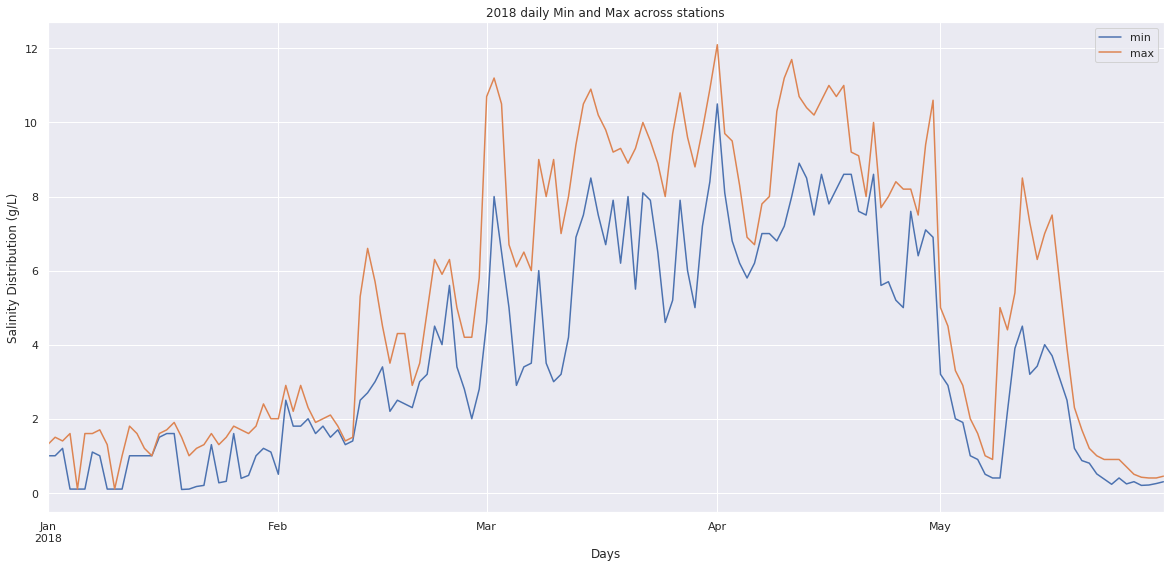

In [15]:
# Daily min and max value across multiple stations
ax = df.loc['2018', 'min'].resample('D').max().plot(figsize=(20, 9), title='2018 daily Min and Max across stations')
df.loc['2018', 'max'].resample('D').max().plot(ax=ax, figsize=(20, 9))
ax.legend(['min', 'max'])
ax.set_xlabel('Days')
ax.set_ylabel('Salinity Distribution (g/L)');

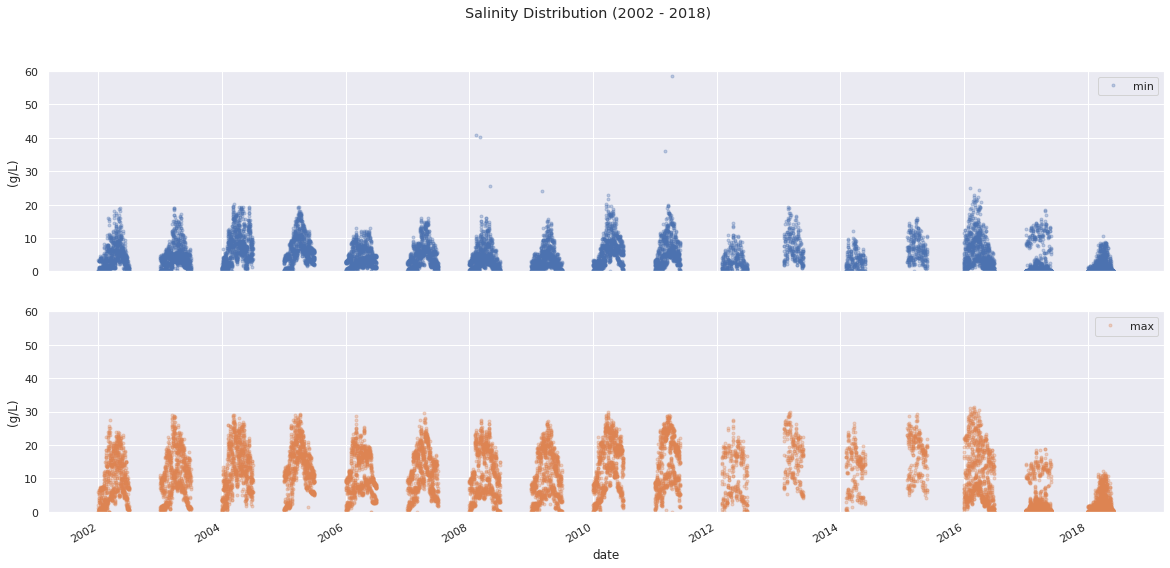

In [16]:
# min and max across station from 2002 to 2018
axes = df[['min', 'max']].plot(marker='.', ylim=[0, 60], alpha=0.3, linestyle='None', figsize=(20, 9), subplots=True, title='Salinity Distribution (2002 - 2018)')
for ax in axes:
    ax.set_ylabel('(g/L)')

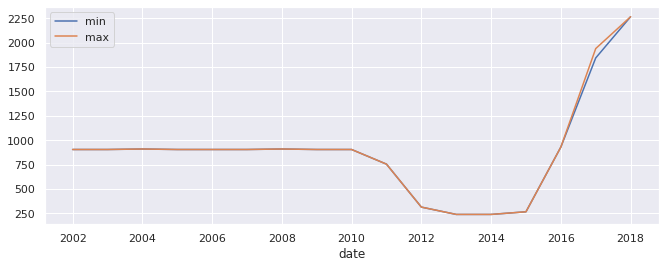

In [17]:
# Number of measurements by year
df.groupby(df.index.year).count()[['min', 'max']].plot();

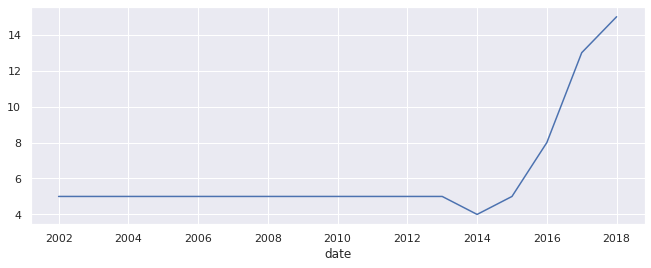

In [18]:
# Number of stations contributed to measurements by year
df.groupby([df.index.year])['code'].nunique().plot();

### Some 'min' greater than 'max', does not make sense

In [19]:
invalid_df = df[df['min'] > df['max']]

invalid_df

code      min      max
date                                     
2002-04-01      ANTHUAN 17.00000 14.50000
2004-01-31      ANTHUAN  6.90000  4.80000
2004-05-23     LOCTHUAN  4.06000  3.36000
2005-05-24       SONDOC  5.00000  1.40000
2008-01-05       SONDOC  0.20000  0.10000
2008-02-09      ANTHUAN 40.80000 21.80000
2008-03-05      ANTHUAN 40.10000 21.00000
2008-05-03       SONDOC 25.50000  5.40000
2009-03-06      BENTRAI 24.00000 12.70000
2011-02-28      BENTRAI 36.00000 23.80000
2011-03-06       SONDOC  2.10000  0.40000
2011-04-12      BINHDAI 58.40000 22.70000
2011-04-12      BENTRAI  6.00000  0.00000
2011-05-27     LOCTHUAN  5.30000  5.10000
2017-01-09        TRACU  2.00000  0.20000
2017-02-15      BENCHUA 13.90000 12.00000
2017-03-24      LANGTHE  0.30000  0.10000
2017-04-17    PHUOCLONG  1.70000  0.20000
2017-04-28  VANGQUOITAY  5.60000  5.20000

In [20]:
# save to csv file to report back data owner for comfirmation
invalid_df.to_csv(f'../../dataset/invalid/min_greater_max.csv', index=True)

In [21]:
# swap them
df['min'], df['max'] = np.where(df['min'] > df['max'], (df['max'], df['min']), (df['min'], df['max']))

In [22]:
# double check if there is any min > max
invalid_df = df[df['min'] > df['max']]

invalid_df.shape

(0, 3)

### Handle missing values in 'min' column

In [23]:
# review measurements having no min values
na_df = df[df['min'].isna()]

na_df.head()

code  min     max
date                          
2017-02-01  MYHOA  nan 0.30000
2017-02-02  MYHOA  nan 0.20000
2017-02-03  MYHOA  nan 0.10000
2017-02-04  MYHOA  nan 0.10000
2017-02-05  MYHOA  nan 0.10000

In [24]:
# save to csv file to report back data owner for comfirmation
na_df.to_csv(f'../../dataset/invalid/nan_min.csv', index=True)

In [25]:
# what is the min measures in case of min = NaN
na_df.groupby([na_df.index.year, 'code']).min()

min     max
date code              
2017 MYHOA  nan 0.10000

In [26]:
# what is the max measures in case of min = NaN
na_df.groupby([na_df.index.year, 'code']).max()

min     max
date code              
2017 MYHOA  nan 2.60000

#### What is the strategy to fill the min NaN?

In [27]:
# Let drop them for now
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15010 entries, 2002-01-01 to 2018-05-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    15010 non-null  object 
 1   min     15010 non-null  float64
 2   max     15010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 469.1+ KB


### Zero and near-zero value samples

In [28]:
zero_df = df[(df['min'] < 0.02) | (df['max'] < 0.02)]

zero_df.head()

code     min     max
date                                
2002-01-01  LOCTHUAN 0.00000 0.00000
2002-01-02  LOCTHUAN 0.00000 0.00000
2002-01-03  LOCTHUAN 0.00000 0.00000
2002-01-04  LOCTHUAN 0.00000 0.00000
2002-01-05  LOCTHUAN 0.00000 0.00000

In [29]:
# how these samples are distributed among stations
sample_zero_df = zero_df['code'].value_counts()

sample_zero_df.head()

TICHTHIEN          302
TIENTHUY           300
TANTHIENG          271
VUNGLIEM           151
HUNGKHANHTRUNGB    151
Name: code, dtype: int64

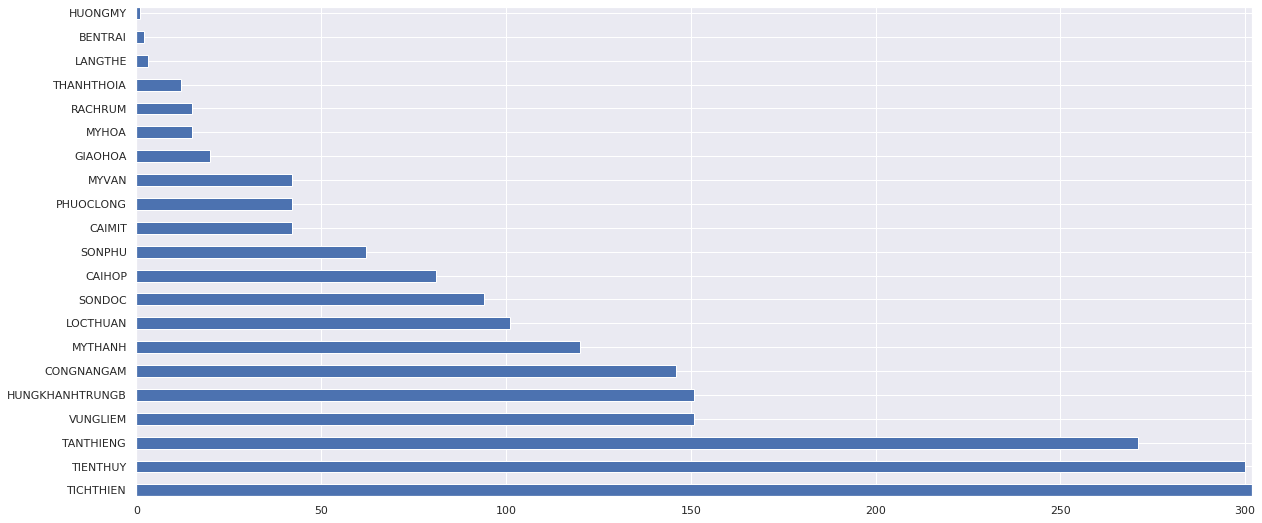

In [30]:
sample_zero_df.plot.barh(figsize=(20, 9)).autoscale(enable=True, axis='both', tight=True)

### Merge GeoPandas based station dataframe with measurement dataframe 

In [31]:
# reload stations from shapefile
station_df = gpd.read_file('../../dataset/station/station.shp', encoding='utf-8')

station_df.crs

{'init': 'epsg:4326'}

In [32]:
station_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      20 non-null     object  
 1   name      20 non-null     object  
 2   x         20 non-null     float64 
 3   y         20 non-null     float64 
 4   ft        20 non-null     float64 
 5   cm        20 non-null     float64 
 6   geometry  20 non-null     geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 1.2+ KB


In [33]:
station_df.head(10)

code           name             x               y       ft  \
0     TIENTHUY      Tiên Thuỷ 638,108.95629 1,132,743.34179  7.00000   
1    PHUOCLONG     Phước Long 654,447.97849 1,120,366.11273 13.00000   
2        MOCAY         Mỏ Cày 640,695.88096 1,114,676.77078 22.00000   
3    TANTHIENG     Tân Thiềng 633,534.72801 1,123,276.54032 17.00000   
4  VANGQUOITAY  Vang Quới Tây 668,101.63713 1,134,363.39362 31.00000   
5       CAMSON        Cẩm Sơn 647,782.35131 1,108,081.20329 19.00000   
6     LOCTHUAN      Lộc Thuận 674,962.03107 1,132,414.50741  9.00000   
7     C.SONDOC     C. Sơn Đốc 661,073.13893 1,111,850.93564  2.00000   
8     C.CAIMIT     C. Cái Mít 656,680.70795 1,117,059.97700 12.00000   
9       SONPHU        Sơn Phú 651,337.94260 1,125,205.88153 24.00000   

         cm                    geometry  
0 213.36000  POINT (106.26103 10.24475)  
1 396.24000  POINT (106.40969 10.13223)  
2 670.56000  POINT (106.28399 10.08130)  
3 518.16000  POINT (106.21894 10.15931)  
4 944.88000  POINT (106.53489 10.25822)  
5 579.12000  POINT (106.34840 10.02140)  
6 274.32000  POINT (106.59743 10.24030)  
7  60.96000  POINT (106.46980 10.05497)  
8 365.76000  POINT (106.42994 10.10224)  
9 731.52000  POINT (106.38150 10.17611)

In [34]:
# replace x, y in WGS84-48N with Latitude, Longitude coordiates
station_df['x'], station_df['y'] = station_df['geometry'].x, station_df['geometry'].y

station_df.head(10)

code           name         x        y       ft        cm  \
0     TIENTHUY      Tiên Thuỷ 106.26103 10.24475  7.00000 213.36000   
1    PHUOCLONG     Phước Long 106.40969 10.13223 13.00000 396.24000   
2        MOCAY         Mỏ Cày 106.28399 10.08130 22.00000 670.56000   
3    TANTHIENG     Tân Thiềng 106.21894 10.15931 17.00000 518.16000   
4  VANGQUOITAY  Vang Quới Tây 106.53489 10.25822 31.00000 944.88000   
5       CAMSON        Cẩm Sơn 106.34840 10.02140 19.00000 579.12000   
6     LOCTHUAN      Lộc Thuận 106.59743 10.24030  9.00000 274.32000   
7     C.SONDOC     C. Sơn Đốc 106.46980 10.05497  2.00000  60.96000   
8     C.CAIMIT     C. Cái Mít 106.42994 10.10224 12.00000 365.76000   
9       SONPHU        Sơn Phú 106.38150 10.17611 24.00000 731.52000   

                     geometry  
0  POINT (106.26103 10.24475)  
1  POINT (106.40969 10.13223)  
2  POINT (106.28399 10.08130)  
3  POINT (106.21894 10.15931)  
4  POINT (106.53489 10.25822)  
5  POINT (106.34840 10.02140)  
6  POINT (106.59743 10.24030)  
7  POINT (106.46980 10.05497)  
8  POINT (106.42994 10.10224)  
9  POINT (106.38150 10.17611)

In [35]:
# drop unused columns
station_df.drop(['name', 'ft', 'geometry'], axis=1, inplace=True)

station_df.head(10)

code         x        y        cm
0     TIENTHUY 106.26103 10.24475 213.36000
1    PHUOCLONG 106.40969 10.13223 396.24000
2        MOCAY 106.28399 10.08130 670.56000
3    TANTHIENG 106.21894 10.15931 518.16000
4  VANGQUOITAY 106.53489 10.25822 944.88000
5       CAMSON 106.34840 10.02140 579.12000
6     LOCTHUAN 106.59743 10.24030 274.32000
7     C.SONDOC 106.46980 10.05497  60.96000
8     C.CAIMIT 106.42994 10.10224 365.76000
9       SONPHU 106.38150 10.17611 731.52000

In [36]:
# reserve the date index
df.reset_index(inplace=True)

df.head()

date      code     min     max
0 2002-01-01   ANTHUAN 3.50000 6.00000
1 2002-01-01  LOCTHUAN 0.00000 0.00000
2 2002-01-01    SONDOC 0.10000 0.30000
3 2002-01-01   BENTRAI 0.20000 1.00000
4 2002-01-01   BINHDAI 0.50000 2.00000

In [37]:
# left join df with station_df
df = df.merge(station_df, on='code', how='left')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15010 entries, 0 to 15009
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15010 non-null  datetime64[ns]
 1   code    15010 non-null  object        
 2   min     15010 non-null  float64       
 3   max     15010 non-null  float64       
 4   x       13349 non-null  float64       
 5   y       13349 non-null  float64       
 6   cm      13349 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 938.1+ KB


In [38]:
df.head(20)

date      code     min     max         x        y        cm
0  2002-01-01   ANTHUAN 3.50000 6.00000 106.57215  9.99752   0.00000
1  2002-01-01  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2  2002-01-01    SONDOC 0.10000 0.30000 106.52635 10.02522  30.48000
3  2002-01-01   BENTRAI 0.20000 1.00000 106.53715  9.87584   0.00000
4  2002-01-01   BINHDAI 0.50000 2.00000 106.69681 10.20635 152.40000
5  2002-01-02   ANTHUAN 3.00000 5.50000 106.57215  9.99752   0.00000
6  2002-01-02  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
7  2002-01-02   BINHDAI 1.00000 3.00000 106.69681 10.20635 152.40000
8  2002-01-02   BENTRAI 0.10000 1.00000 106.53715  9.87584   0.00000
9  2002-01-02    SONDOC 0.10000 0.40000 106.52635 10.02522  30.48000
10 2002-01-03   BINHDAI 1.10000 3.50000 106.69681 10.20635 152.40000
11 2002-01-03    SONDOC 0.20000 0.40000 106.52635 10.02522  30.48000
12 2002-01-03  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
13 2002-01-03   BENTRAI 0.10000 0.80000 106.53715  9.87584   0.00000
14 2002-01-03   ANTHUAN 3.10000 5.20000 106.57215  9.99752   0.00000
15 2002-01-04  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
16 2002-01-04   ANTHUAN 3.00000 5.00000 106.57215  9.99752   0.00000
17 2002-01-04   BINHDAI 1.20000 4.00000 106.69681 10.20635 152.40000
18 2002-01-04    SONDOC 0.20000 0.50000 106.52635 10.02522  30.48000
19 2002-01-04   BENTRAI 0.10000 0.50000 106.53715  9.87584   0.00000

In [39]:
# restore date index
df.set_index('date', inplace=True)

df.head(20)

code     min     max         x        y        cm
date                                                             
2002-01-01   ANTHUAN 3.50000 6.00000 106.57215  9.99752   0.00000
2002-01-01  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2002-01-01    SONDOC 0.10000 0.30000 106.52635 10.02522  30.48000
2002-01-01   BENTRAI 0.20000 1.00000 106.53715  9.87584   0.00000
2002-01-01   BINHDAI 0.50000 2.00000 106.69681 10.20635 152.40000
2002-01-02   ANTHUAN 3.00000 5.50000 106.57215  9.99752   0.00000
2002-01-02  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2002-01-02   BINHDAI 1.00000 3.00000 106.69681 10.20635 152.40000
2002-01-02   BENTRAI 0.10000 1.00000 106.53715  9.87584   0.00000
2002-01-02    SONDOC 0.10000 0.40000 106.52635 10.02522  30.48000
2002-01-03   BINHDAI 1.10000 3.50000 106.69681 10.20635 152.40000
2002-01-03    SONDOC 0.20000 0.40000 106.52635 10.02522  30.48000
2002-01-03  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2002-01-03   BENTRAI 0.10000 0.80000 106.53715  9.87584   0.00000
2002-01-03   ANTHUAN 3.10000 5.20000 106.57215  9.99752   0.00000
2002-01-04  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2002-01-04   ANTHUAN 3.00000 5.00000 106.57215  9.99752   0.00000
2002-01-04   BINHDAI 1.20000 4.00000 106.69681 10.20635 152.40000
2002-01-04    SONDOC 0.20000 0.50000 106.52635 10.02522  30.48000
2002-01-04   BENTRAI 0.10000 0.50000 106.53715  9.87584   0.00000

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15010 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    15010 non-null  object 
 1   min     15010 non-null  float64
 2   max     15010 non-null  float64
 3   x       13349 non-null  float64
 4   y       13349 non-null  float64
 5   cm      13349 non-null  float64
dtypes: float64(5), object(1)
memory usage: 820.9+ KB


### There are stations without coordinates

In [41]:
nocoor_df = df[(df['x'].isna()) | (df['y'].isna())]

nocoor_df.head()

code      min      max   x   y  cm
date                                               
2017-01-01     CAIHOP  0.10000  0.10000 nan nan nan
2017-01-01  TICHTHIEN  0.00000  0.00000 nan nan nan
2017-01-01      MYVAN  0.20000  0.60000 nan nan nan
2017-01-01    BENCHUA 11.00000 14.00000 nan nan nan
2017-01-01      TRACU  0.30000  0.60000 nan nan nan

In [42]:
nocoor_df = nocoor_df.groupby('code')['max'].count()
nocoor_df = pd.DataFrame(nocoor_df).rename(columns = {'max': 'count'})

nocoor_df

count
code             
BENCHUA       151
CAIHOP        151
CAIMIT        151
CONGNANGAM    151
LANGTHE       151
MYVAN         151
RACHRUM       151
TICHTHIEN     302
TRACU         151
VUNGLIEM      151

In [43]:
# save to csv file to report back data owner for comfirmation
nocoor_df.to_csv(f'../../dataset/invalid/nocoor.csv', index=True)

### Since CAIMIT coordinate was not privided but C.CAIMIT was. Let assume they are the same

In [44]:
# How many samples from C.CAIMIT
df[df['code'] == 'C.CAIMIT'].shape[0]

0

In [45]:
# How many sample from CAIMIT
df[df['code'] == 'CAIMIT'].head()

code     min     max   x   y  cm
date                                          
2018-01-01  CAIMIT 0.00000 0.00000 nan nan nan
2018-01-02  CAIMIT 0.00000 0.00000 nan nan nan
2018-01-03  CAIMIT 0.00000 0.00000 nan nan nan
2018-01-04  CAIMIT 0.00000 0.00000 nan nan nan
2018-01-05  CAIMIT 0.00000 0.00000 nan nan nan

In [46]:
# set CAIMIT station info by C.CAIMIT's
df.loc[df['code'] == 'CAIMIT', ['x', 'y', 'cm']] = station_df[station_df['code'] == 'C.CAIMIT'][['x', 'y', 'cm']].values

In [47]:
df[df['code'] == 'CAIMIT'].head()

code     min     max         x        y        cm
date                                                           
2018-01-01  CAIMIT 0.00000 0.00000 106.42994 10.10224 365.76000
2018-01-02  CAIMIT 0.00000 0.00000 106.42994 10.10224 365.76000
2018-01-03  CAIMIT 0.00000 0.00000 106.42994 10.10224 365.76000
2018-01-04  CAIMIT 0.00000 0.00000 106.42994 10.10224 365.76000
2018-01-05  CAIMIT 0.00000 0.00000 106.42994 10.10224 365.76000

### Final training dataset

In [48]:
# drop samples which their stations have no coordinates
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13500 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    13500 non-null  object 
 1   min     13500 non-null  float64
 2   max     13500 non-null  float64
 3   x       13500 non-null  float64
 4   y       13500 non-null  float64
 5   cm      13500 non-null  float64
dtypes: float64(5), object(1)
memory usage: 738.3+ KB


In [49]:
df.index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02',
               ...
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31'],
              dtype='datetime64[ns]', name='date', length=13500, freq=None)

In [50]:
df.sort_index(inplace= True)

In [51]:
df.head(5)

code     min     max         x        y        cm
date                                                             
2002-01-01   ANTHUAN 3.50000 6.00000 106.57215  9.99752   0.00000
2002-01-01  LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2002-01-01    SONDOC 0.10000 0.30000 106.52635 10.02522  30.48000
2002-01-01   BENTRAI 0.20000 1.00000 106.53715  9.87584   0.00000
2002-01-01   BINHDAI 0.50000 2.00000 106.69681 10.20635 152.40000

In [52]:
df.tail(5)

code     min     max         x        y        cm
date                                                              
2018-05-31      MOCAY 0.10000 0.10000 106.28399 10.08130 670.56000
2018-05-31   LOCTHUAN 0.00000 0.00000 106.59743 10.24030 274.32000
2018-05-31  PHUOCLONG 0.10000 0.10000 106.40969 10.13223 396.24000
2018-05-31  TANTHIENG 0.00000 0.00000 106.21894 10.15931 518.16000
2018-05-31     SONPHU 0.00000 0.00000 106.38150 10.17611 731.52000

In [53]:
# save to csv file as training dataset
df.to_csv(f'../../dataset/final/training.csv', index=True)

### Apply some statistical analysis

In [54]:
# number of stations
station_count_df = df['code'].value_counts()

station_count_df

SONDOC             2271
LOCTHUAN           2154
BENTRAI            2108
BINHDAI            2108
ANTHUAN            2108
PHUOCLONG           302
TANTHIENG           302
TIENTHUY            302
MOCAY               302
MYHOA               212
GIAOHOA             182
THANHTHOIA          151
MYTHANH             151
HUNGKHANHTRUNGB     151
SONPHU              151
CAIMIT              151
CAMSON              151
VANGQUOITAY         151
HUONGMY              92
Name: code, dtype: int64

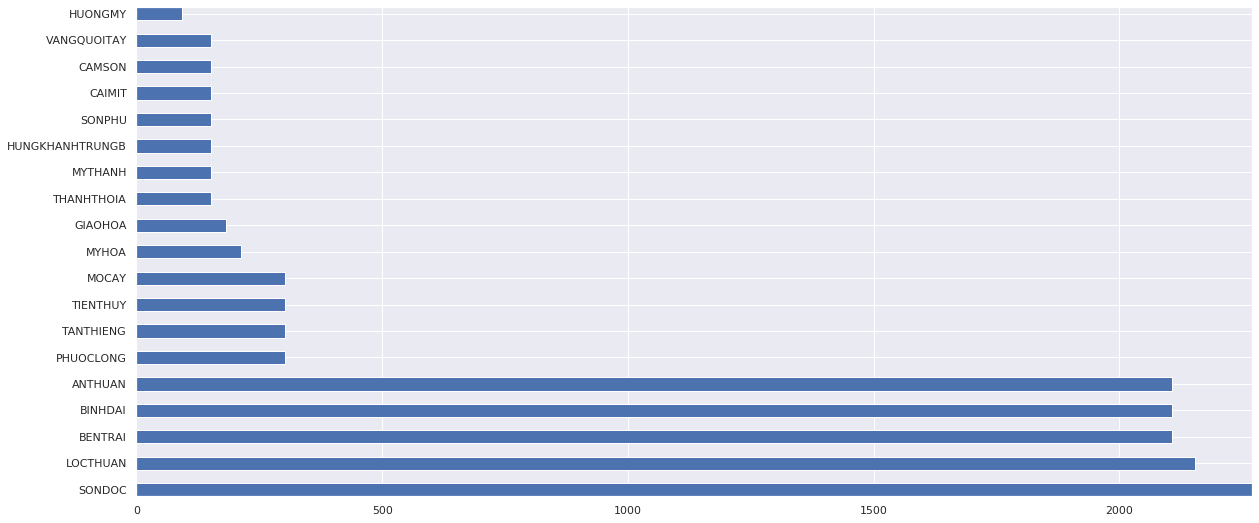

In [55]:
# how stations are contributed in the dataset
station_count_df.plot.barh(figsize=(20, 9)).autoscale(enable=True, axis='both', tight=True)

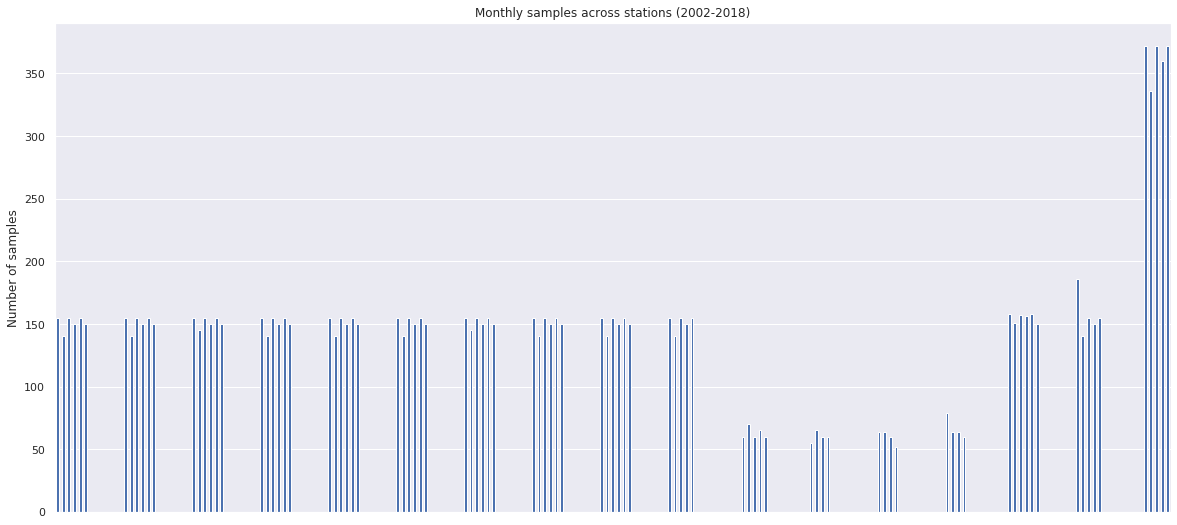

In [56]:
# numbers of samples by months
ax = df['min'].resample('M').count().plot.bar(figsize=(20, 9), title='Monthly samples across stations (2002-2018)')
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel('Number of samples');

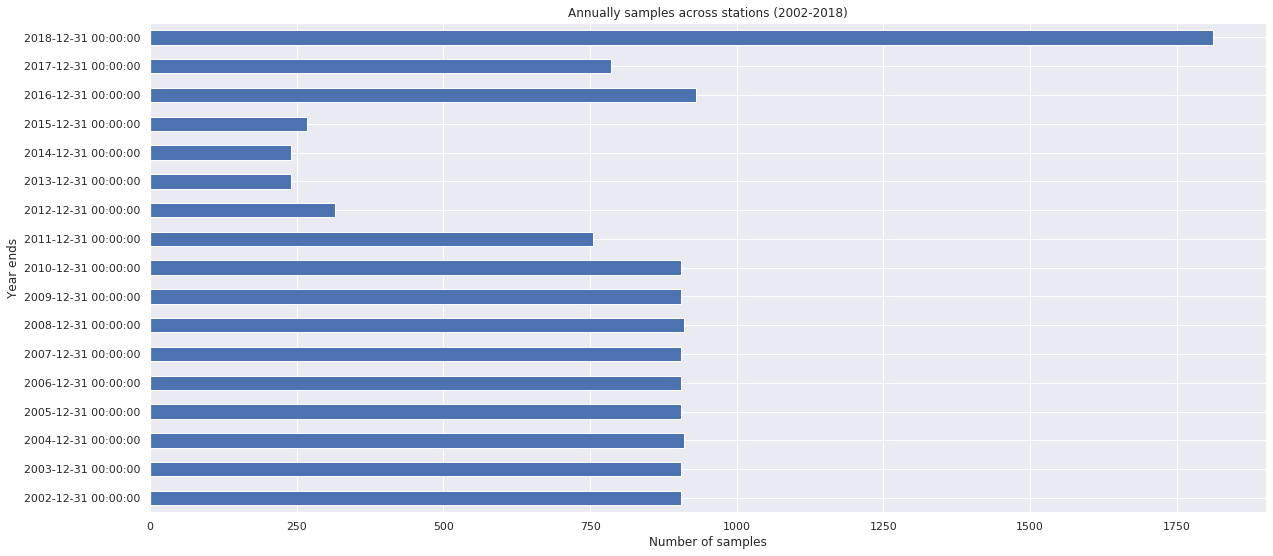

In [57]:
# number samples by year
ax = df['min'].resample('A').count().plot.barh(figsize=(20, 9), title='Annually samples across stations (2002-2018)')
ax.set_xlabel('Number of samples');
ax.set_ylabel('Year ends');

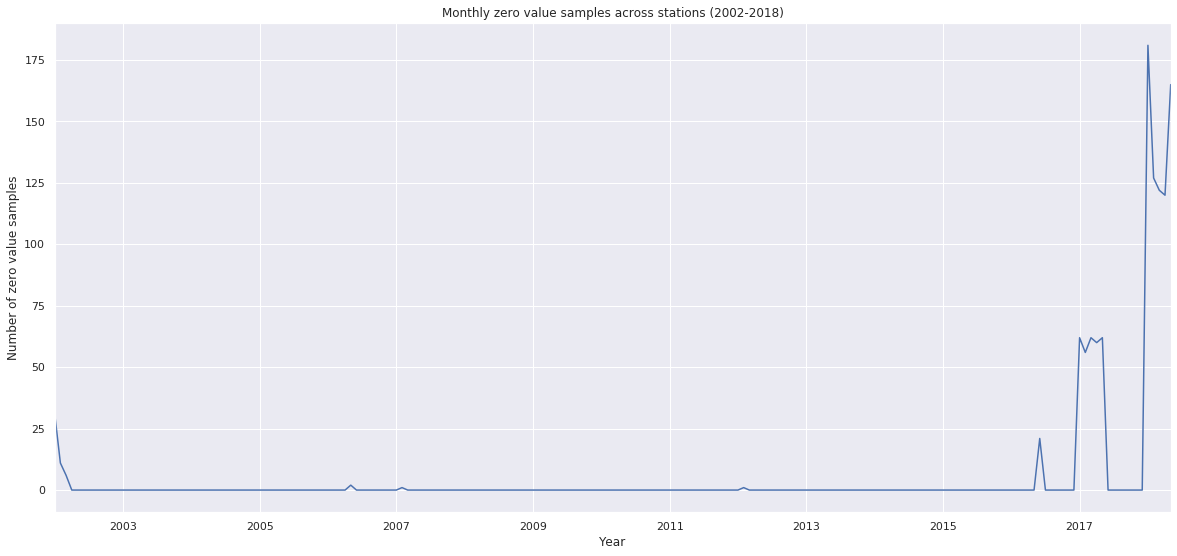

In [58]:
# zero/near zero value samples distrubuted by months
ax = df[df['max'] < 0.02].resample('M')['max'].count().plot(figsize=(20, 9), title='Monthly zero value samples across stations (2002-2018)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of zero value samples');

#### About 10% of 2017 and 2018 samples are zero values  
Consider to remove them if the prediction looks unrealistic

### Min vs. Max

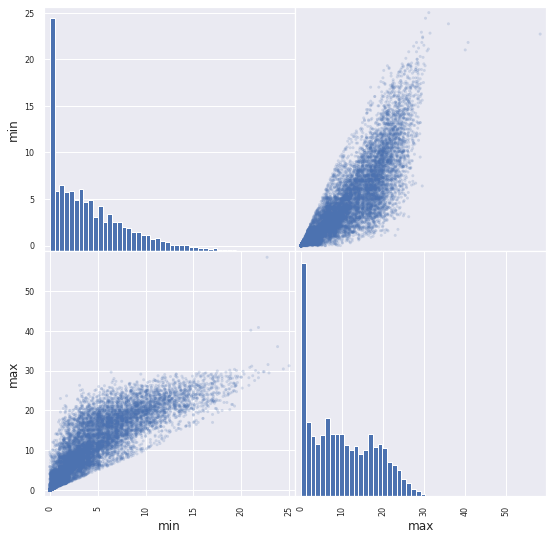

In [59]:
scatter_matrix(df[['min', 'max']], figsize=(9,9), alpha=0.2, hist_kwds={'bins':50});

There are about 3 to 5 outliners but over all, min and max values are pretty much linearly related

In [60]:
# function plot field on each station per year
def plot_sample_by_station_and_year(df, field):
    nrows = 9
    ncols = 2

    station_codes = station_count_df.index.to_numpy()

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10 * nrows))

    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            year = 2002 + row * ncols + col

            for code in station_codes:
                temp_df = df[(df.index.year == year) & (df['code'] == code)]
                if temp_df.shape[0] > 0:
                    temp_df[field].plot(ax=ax)

            ax.legend(station_codes)
            ax.set_title(f'{field} by year {year} on each station')
            ax.set_xlabel('Days')
            ax.set_ylabel('Salinity Distribution (g/L)');

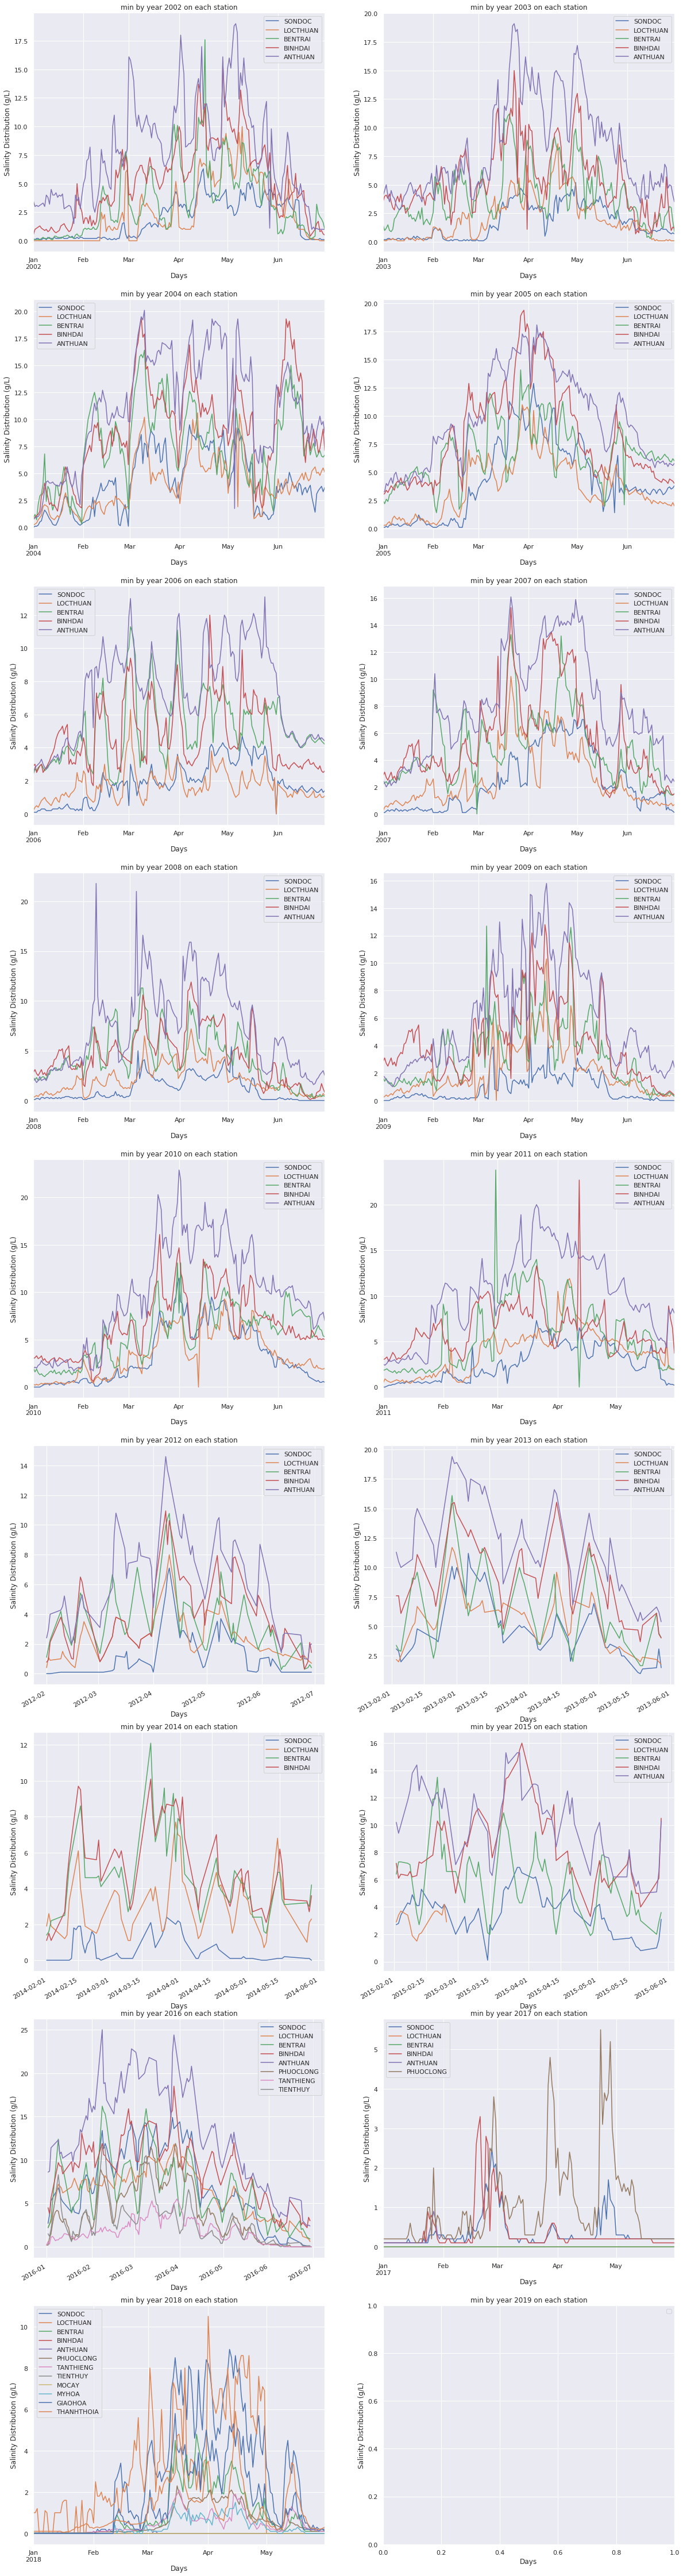

In [61]:
# plot min values of all stations by year 2002 - 2018
plot_sample_by_station_and_year(df, 'min')

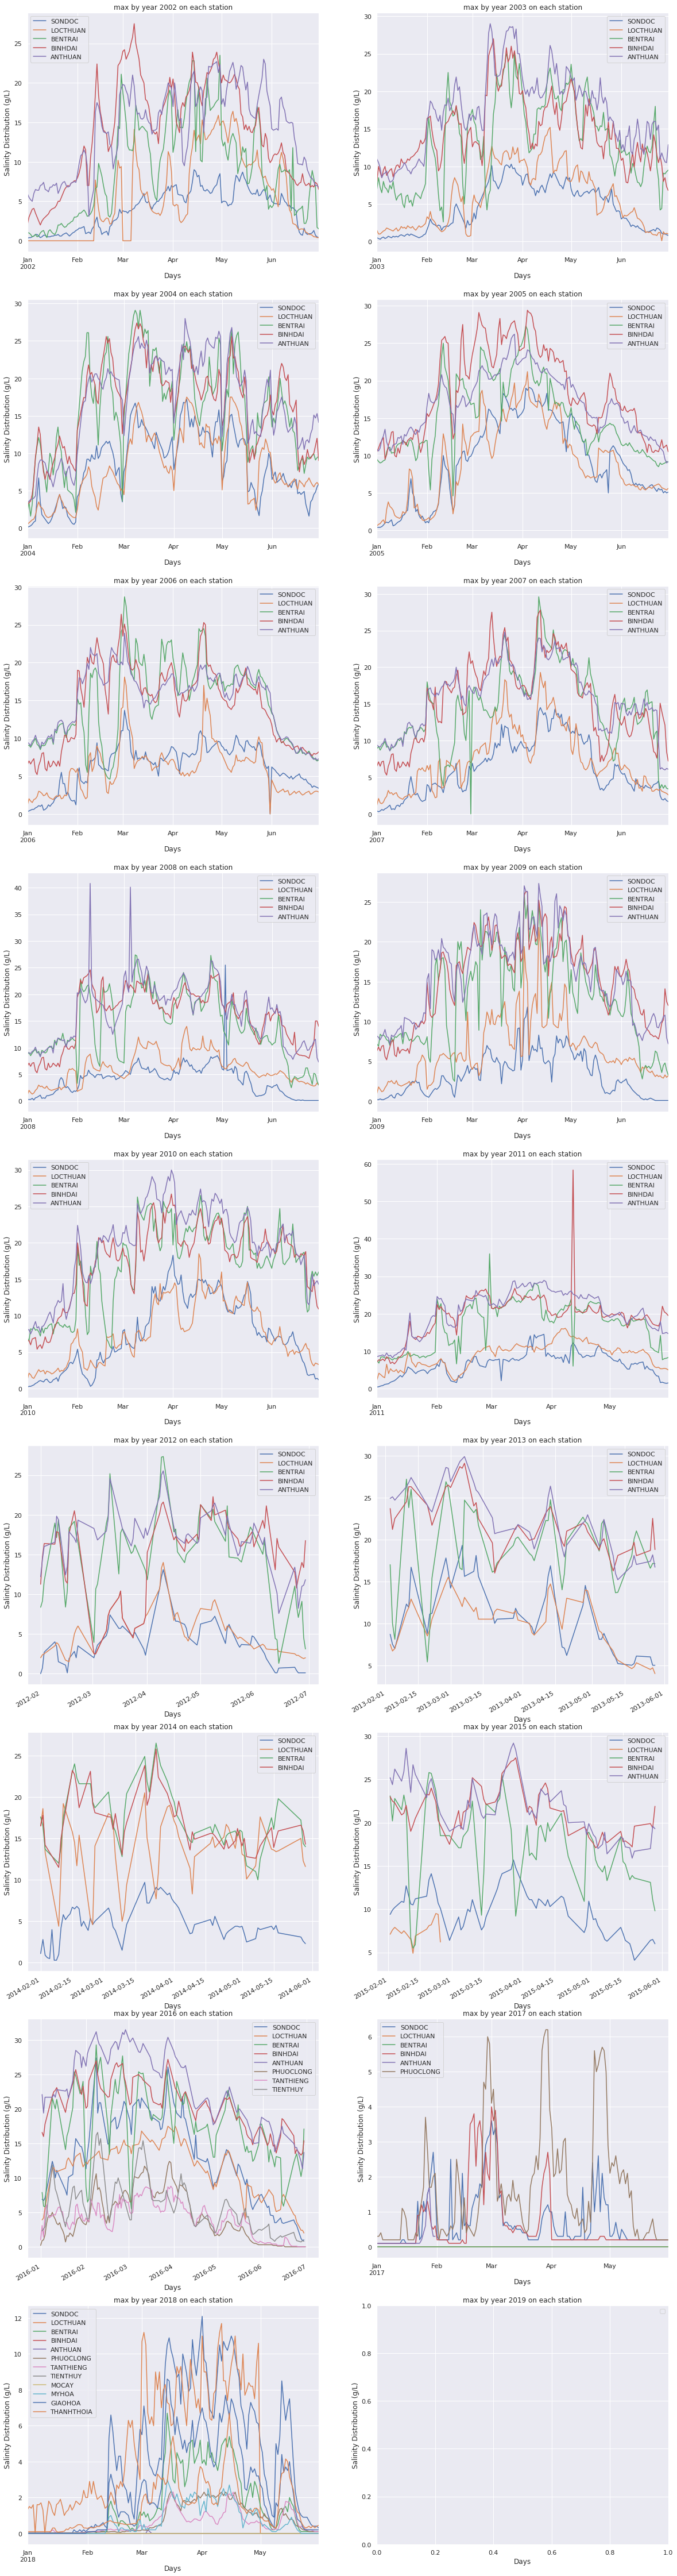

In [62]:
# plot max values of all stations by year 2002 - 2018
plot_sample_by_station_and_year(df, 'max')

### Trend and cyclical components

In [63]:
min_cycle, min_trend = sm.tsa.filters.hpfilter(df['min'])
max_cycle, max_trend = sm.tsa.filters.hpfilter(df['max'])

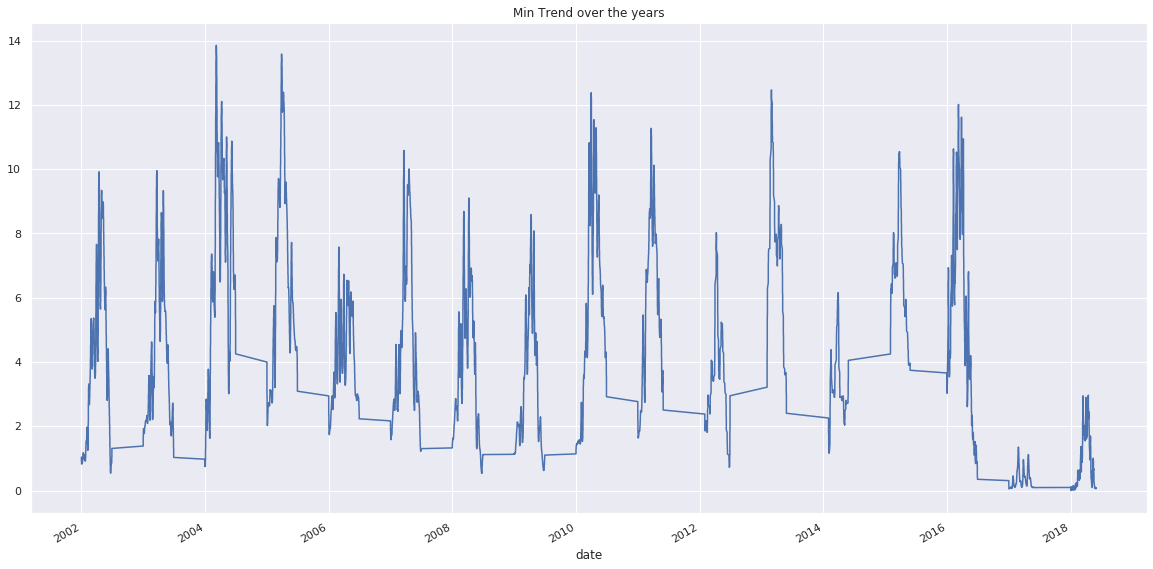

In [64]:
min_trend.plot(figsize=(20,10), title='Min Trend over the years');

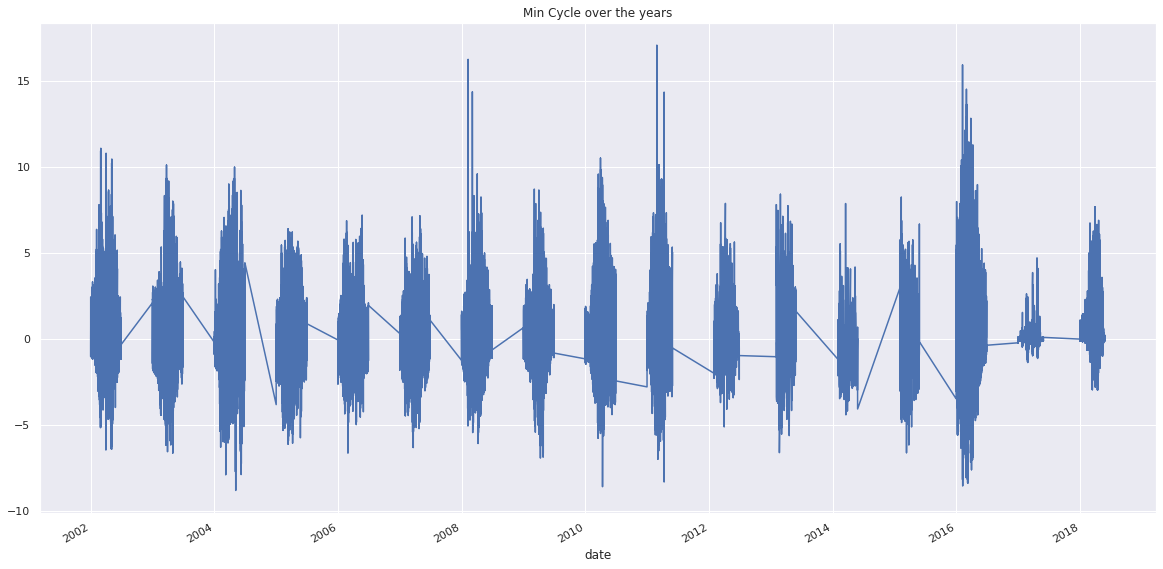

In [65]:
min_cycle.plot(figsize=(20,10), title='Min Cycle over the years');

2017 samples were not reliable, not enough

### Moving Average

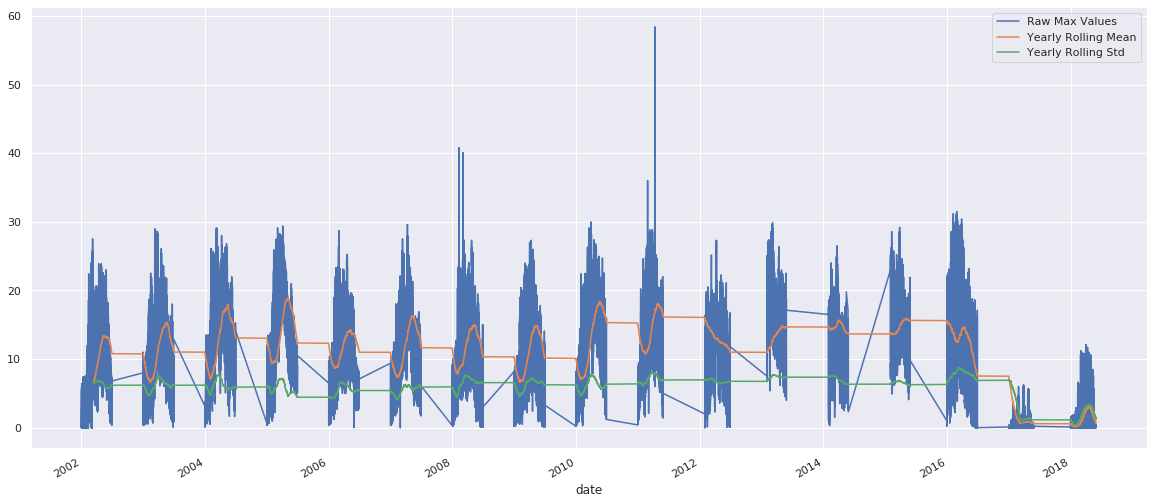

In [66]:
# SMA - Simple Moving Average - Yearly
df['max'].plot(figsize=(20, 9), label='Raw Max Values')
df['max'].rolling(window=365).mean().plot(figsize=(20, 9), label='Yearly Rolling Mean')
df['max'].rolling(window=365).std().plot(figsize=(20, 9), label='Yearly Rolling Std')
plt.legend();

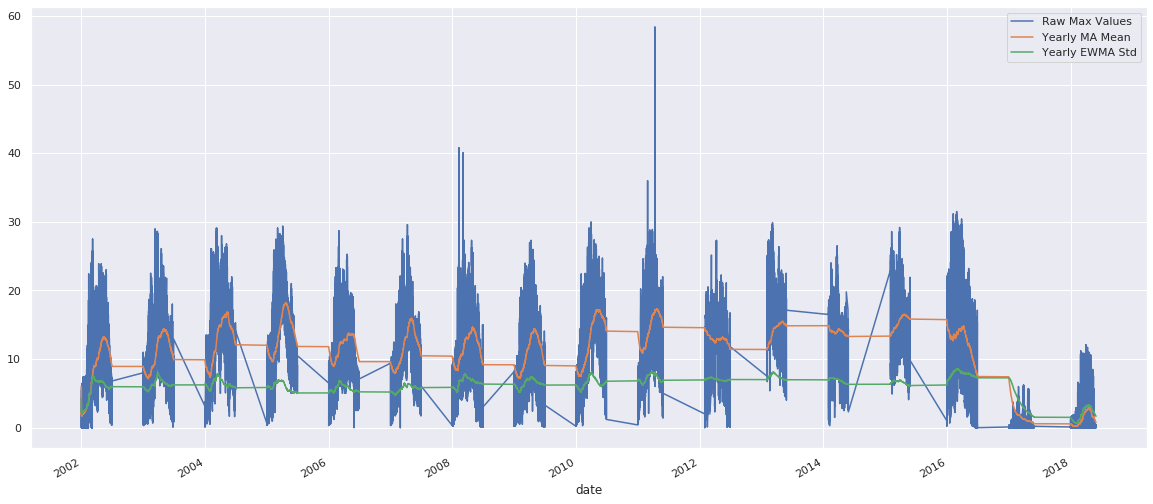

In [67]:
# EWMA - Exponentially-weighted moving average - Yearly
df['max'].plot(figsize=(20, 9), label='Raw Max Values')
df['max'].ewm(span=365).mean().plot(figsize=(20, 9), label='Yearly MA Mean')
df['max'].ewm(span=365).std().plot(figsize=(20, 9), label='Yearly EWMA Std')
plt.legend();

The SMA and EWMA are pretty much the same. Pay attention to the STD lines, they are wiggle, it means the dataset is not well distributed

### Seasonal Decomposition aka ETS Decomposition

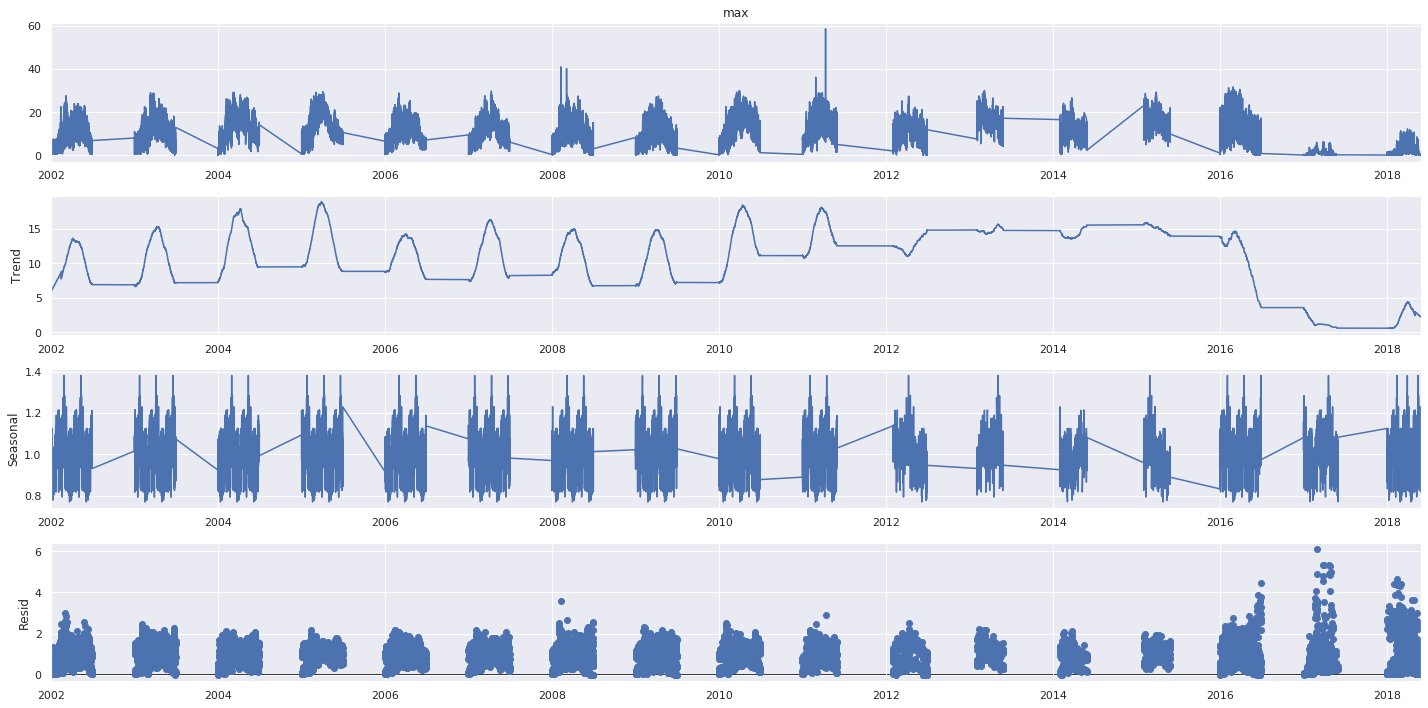

In [68]:
# multiplicative - 365 days on max value

# option 1 to set figsize for plot() used by seasonal_decompose()
plt.rcParams['figure.figsize'] = (20, 10)

result = seasonal_decompose(df[df['max'] > 0.02]['max'], model='multiplicative', period=365, extrapolate_trend=365)
fig = result.plot()  # assign to a variable to work-around double charts in statmodels

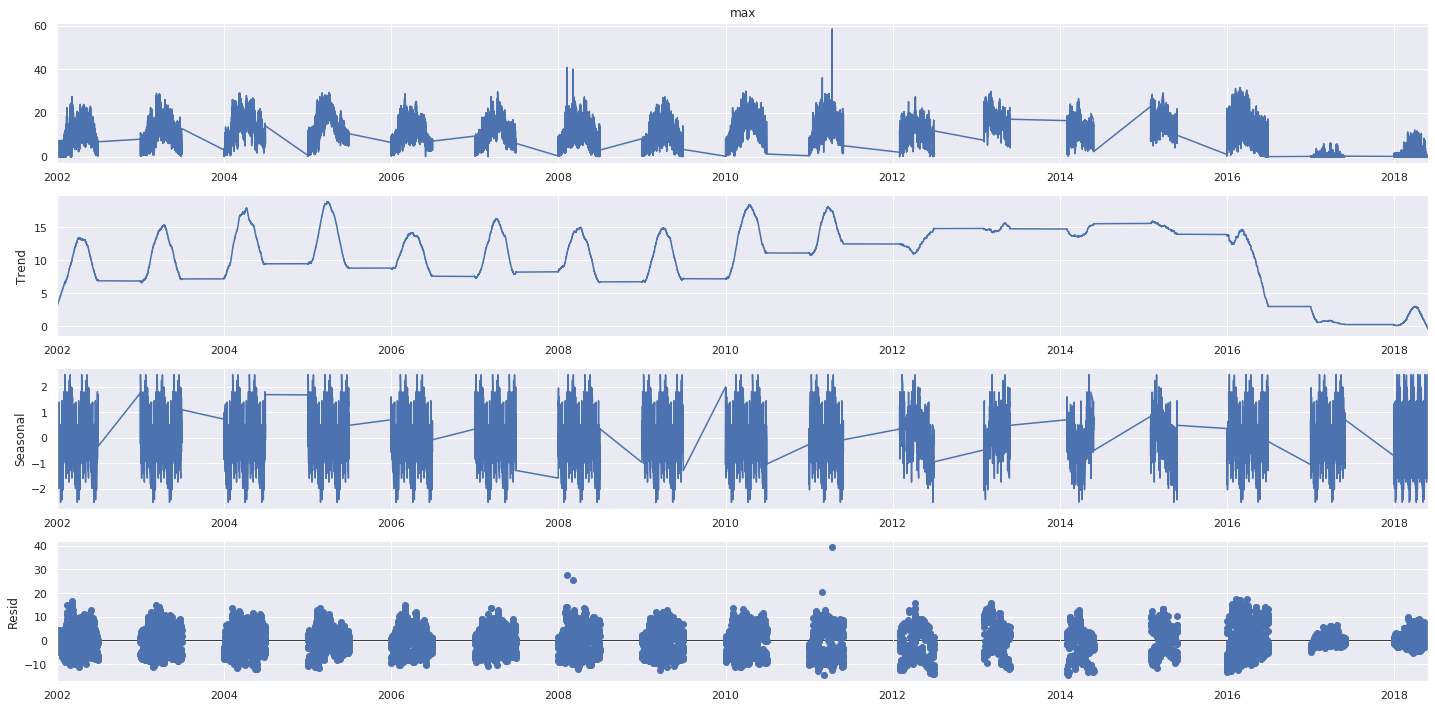

In [69]:
# additive - 365 days on max value
result = seasonal_decompose(df['max'], model='additive', period=365, extrapolate_trend=365)
fig = result.plot()  # assign to a variable to work-around double charts in statmodels

# option 2 to set figsize for plot() used by seasonal_decompose()
fig.set_size_inches(20, 10);

Multiplicative seasonal adjustment, which is accomplished by multiply or dividing each value of the time series by a seasonal index (a number in the vicinity of 1.0) that represents the percentage of normal typically observed in that season.  

Additive seasonal adjustment is used for time series whose seasonal variations are roughly constant in magnitude, independent of the current average level of the series, would be a candidate for additive seasonal adjustment. In additive seasonal adjustment, each value of a time series is adjusted by adding or subtracting a quantity that represents the absolute amount by which the value in that season of the year tends to be below or above normal, as estimated from past data.

Additive seasonal patterns are somewhat rare in nature, but a series that has a natural multiplicative seasonal pattern is converted to one with an additive seasonal pattern by applying a logarithm transformation to the original data. Therefore, if you are using seasonal adjustment in conjunction with a logarithm transformation, you probably should use additive rather than multiplicative seasonal adjustment.  

The residuals are in big numbers which mean there are many errors in the samples could not be explained in the trend seasonality counter parts

In [70]:
# trend component
result.trend.head()

date
2002-01-01   2.97260
2002-01-01   2.99383
2002-01-01   3.01506
2002-01-01   3.03629
2002-01-01   3.05751
Name: trend, dtype: float64

In [71]:
# seasonal component
result.seasonal.head()

date
2002-01-01   -0.35484
2002-01-01   -0.01592
2002-01-01    0.79979
2002-01-01    0.97564
2002-01-01   -0.17735
Name: seasonal, dtype: float64

In [72]:
# residual component
result.resid.head()

date
2002-01-01    3.38225
2002-01-01   -2.97791
2002-01-01   -3.51485
2002-01-01   -3.01193
2002-01-01   -0.88017
Name: resid, dtype: float64

#### Since combining samples across station created noisy. We should analyze by each station:
1. There are 5 critical stations: Ben Trai, An Thuan, Binh Dai, Son Doc, and Loc Thuan, let decomposing on one of them:

In [73]:
# Number of samples by years
temp_df = df[df['code'] == 'BENTRAI']
temp_df.groupby(temp_df.index.year).count()

code  min  max    x    y   cm
date                               
2002   181  181  181  181  181  181
2003   181  181  181  181  181  181
2004   182  182  182  182  182  182
2005   181  181  181  181  181  181
2006   181  181  181  181  181  181
2007   181  181  181  181  181  181
2008   182  182  182  182  182  182
2009   181  181  181  181  181  181
2010   181  181  181  181  181  181
2011   151  151  151  151  151  151
2012    63   63   63   63   63   63
2013    48   48   48   48   48   48
2014    57   57   57   57   57   57
2015    63   63   63   63   63   63
2016    95   95   95   95   95   95

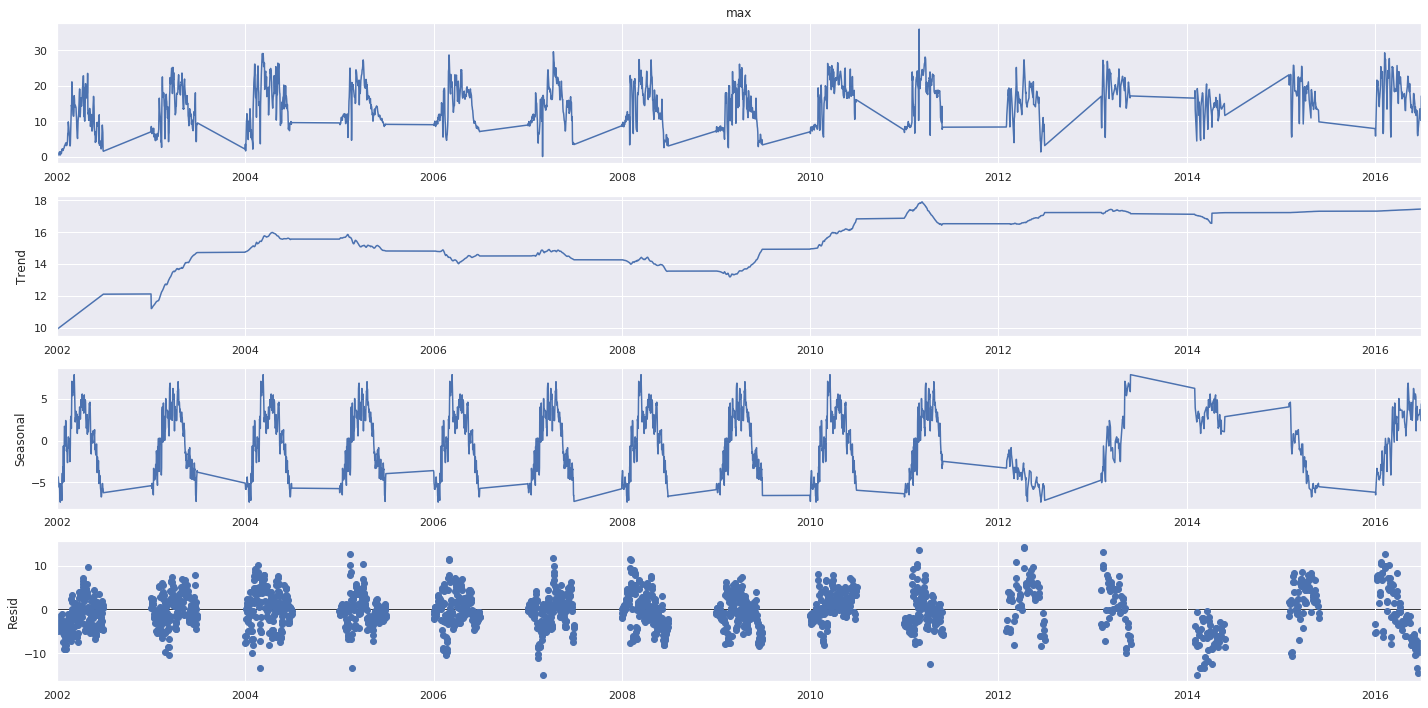

In [74]:
p = seasonal_decompose(df.loc[df['code'] == 'BENTRAI', 'max'], model='additive', period=365, extrapolate_trend=365).plot()

In [75]:
# Number of samples by years
temp_df = df[df['code'] == 'ANTHUAN']
temp_df.groupby(temp_df.index.year).count()

code  min  max    x    y   cm
date                               
2002   181  181  181  181  181  181
2003   181  181  181  181  181  181
2004   182  182  182  182  182  182
2005   181  181  181  181  181  181
2006   181  181  181  181  181  181
2007   181  181  181  181  181  181
2008   182  182  182  182  182  182
2009   181  181  181  181  181  181
2010   181  181  181  181  181  181
2011   151  151  151  151  151  151
2012    63   63   63   63   63   63
2013    48   48   48   48   48   48
2014    57   57   57   57   57   57
2015    63   63   63   63   63   63
2016    95   95   95   95   95   95

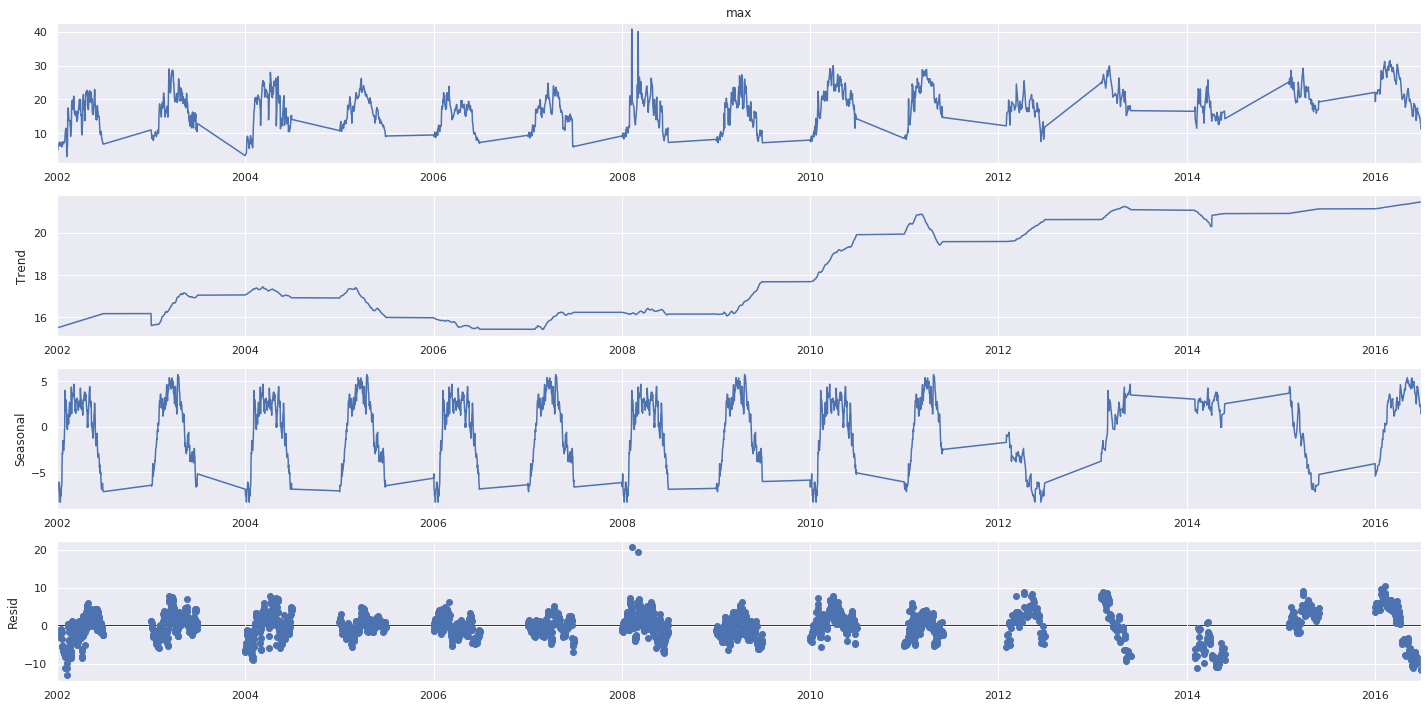

In [76]:
p = seasonal_decompose(df.loc[df['code'] == 'ANTHUAN', 'max'], model='additive', period=365, extrapolate_trend=365).plot()

In [77]:
# Number of samples by years
temp_df = df[df['code'] == 'BINHDAI']
temp_df.groupby(temp_df.index.year).count()

code  min  max    x    y   cm
date                               
2002   181  181  181  181  181  181
2003   181  181  181  181  181  181
2004   182  182  182  182  182  182
2005   181  181  181  181  181  181
2006   181  181  181  181  181  181
2007   181  181  181  181  181  181
2008   182  182  182  182  182  182
2009   181  181  181  181  181  181
2010   181  181  181  181  181  181
2011   151  151  151  151  151  151
2012    63   63   63   63   63   63
2013    48   48   48   48   48   48
2014    57   57   57   57   57   57
2015    63   63   63   63   63   63
2016    95   95   95   95   95   95

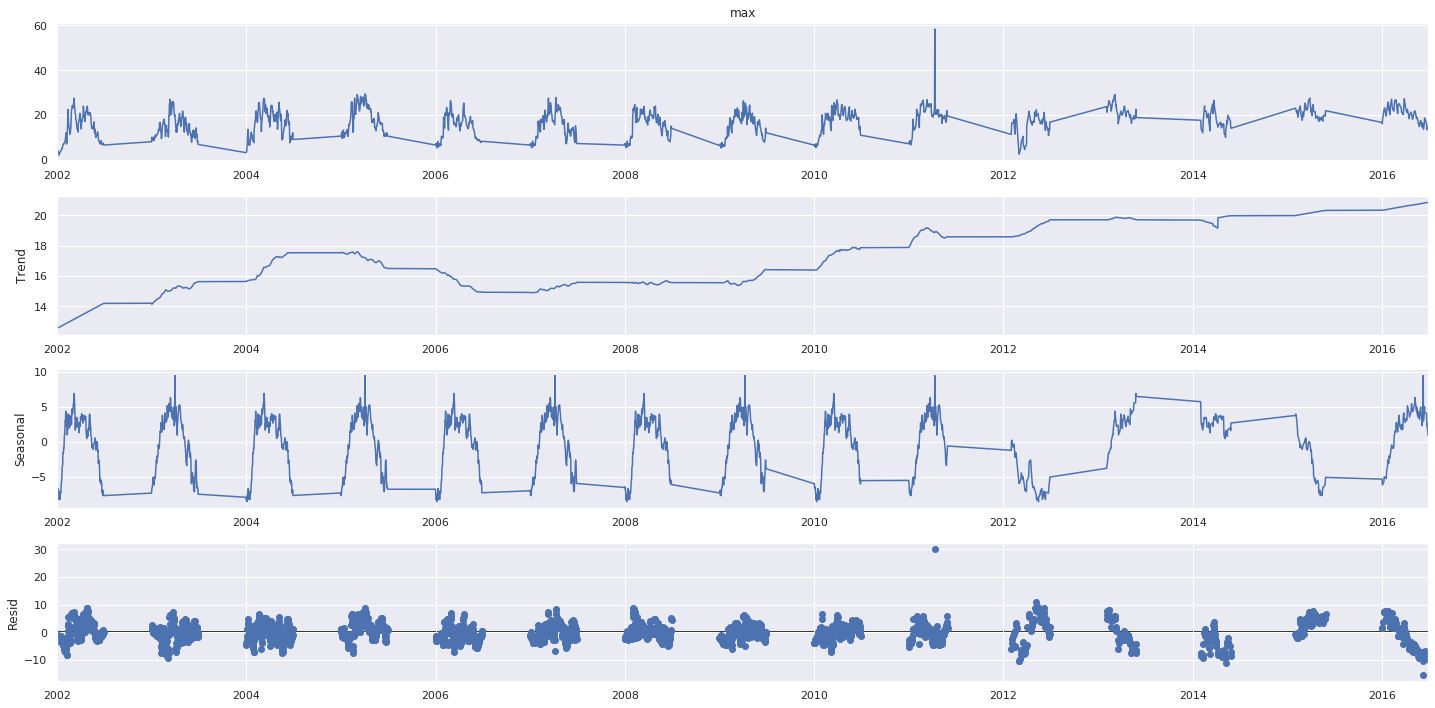

In [78]:
p = seasonal_decompose(df.loc[df['code'] == 'BINHDAI', 'max'], model='additive', period=365, extrapolate_trend=365).plot()

In [79]:
# Number of samples by years
temp_df = df[df['code'] == 'SONDOC']
temp_df.groupby(temp_df.index.year).count()

code  min  max    x    y   cm
date                               
2002   181  181  181  181  181  181
2003   181  181  181  181  181  181
2004   182  182  182  182  182  182
2005   181  181  181  181  181  181
2006   181  181  181  181  181  181
2007   181  181  181  181  181  181
2008   182  182  182  182  182  182
2009   181  181  181  181  181  181
2010   181  181  181  181  181  181
2011   151  151  151  151  151  151
2012    63   63   63   63   63   63
2013    48   48   48   48   48   48
2014    69   69   69   69   69   69
2015    63   63   63   63   63   63
2016    95   95   95   95   95   95
2018   151  151  151  151  151  151

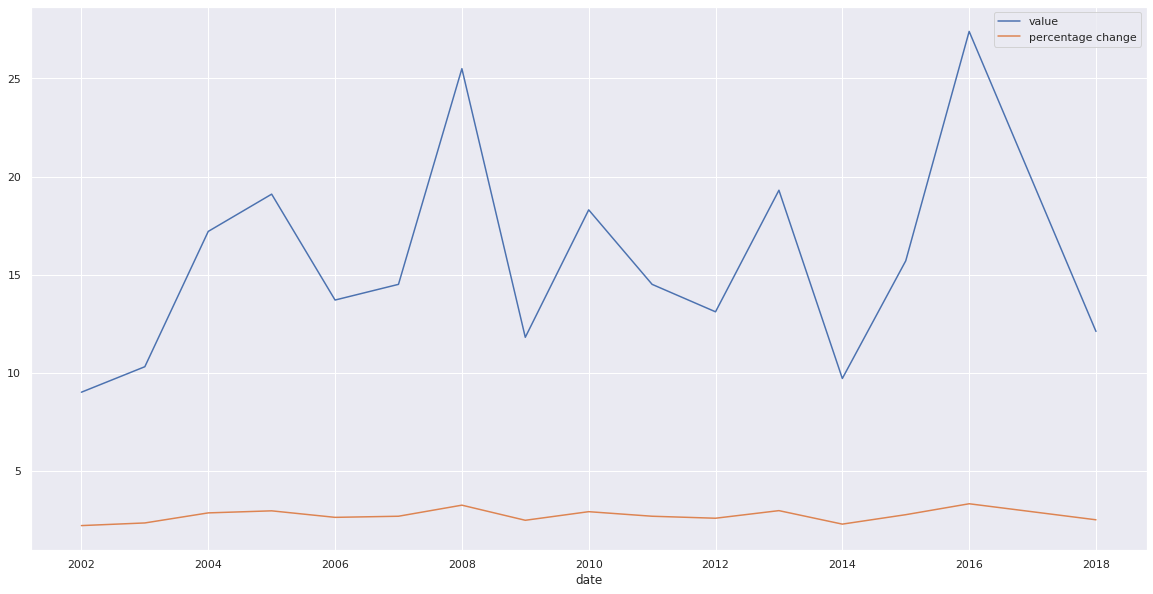

In [80]:
# value changes
temp_df = df.loc[(df['code'] == 'SONDOC') & (df['max'] > 0.02), 'max']

plot_df = pd.DataFrame()
plot_df['value'] = temp_df.groupby(temp_df.index.year).max()
plot_df['percentage change'] = np.log(plot_df['value'])
plot_df.plot()

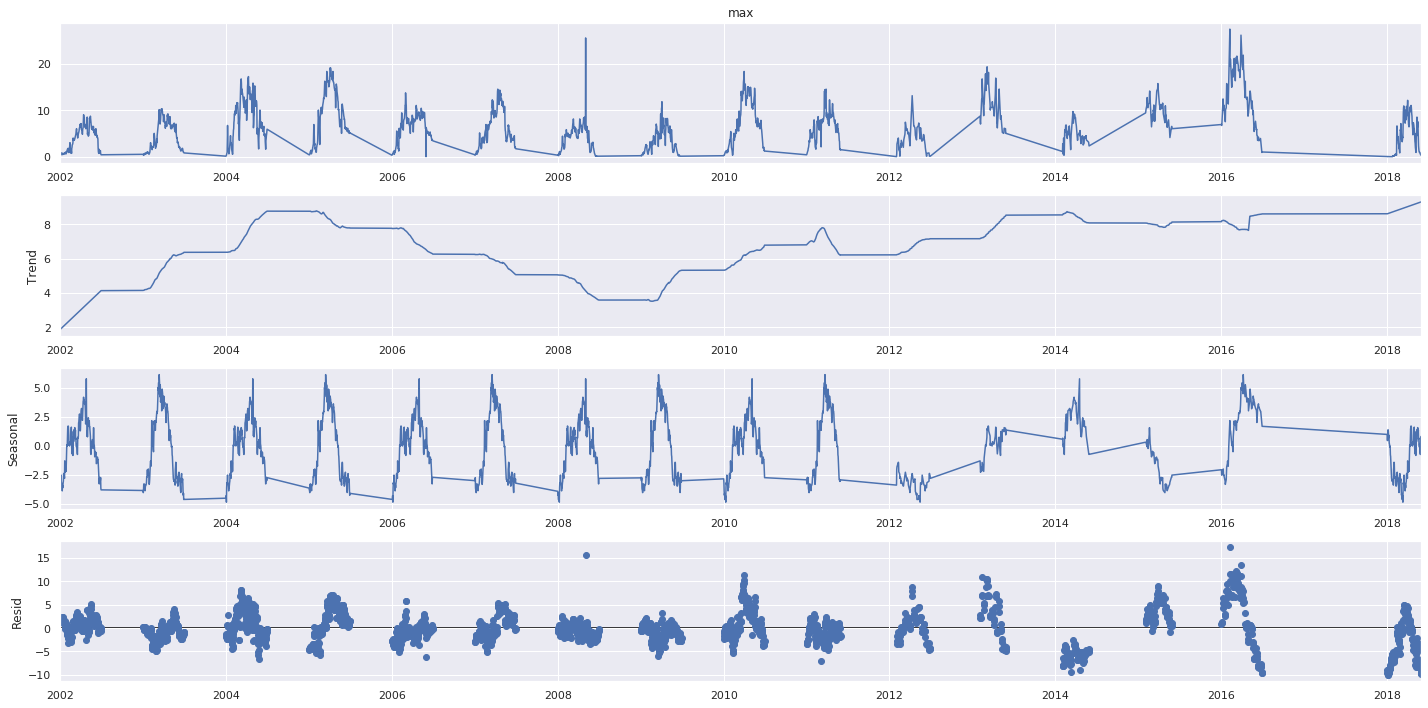

In [81]:
p = seasonal_decompose(df.loc[df['code'] == 'SONDOC', 'max'], model='additive', period=365, extrapolate_trend=365).plot()

In [82]:
# Number of samples by years
temp_df = df[df['code'] == 'LOCTHUAN']
temp_df.groupby(temp_df.index.year).count()

code  min  max    x    y   cm
date                               
2002   181  181  181  181  181  181
2003   181  181  181  181  181  181
2004   182  182  182  182  182  182
2005   181  181  181  181  181  181
2006   181  181  181  181  181  181
2007   181  181  181  181  181  181
2008   182  182  182  182  182  182
2009   181  181  181  181  181  181
2010   181  181  181  181  181  181
2011   151  151  151  151  151  151
2012    63   63   63   63   63   63
2013    48   48   48   48   48   48
2015    15   15   15   15   15   15
2016    95   95   95   95   95   95
2018   151  151  151  151  151  151

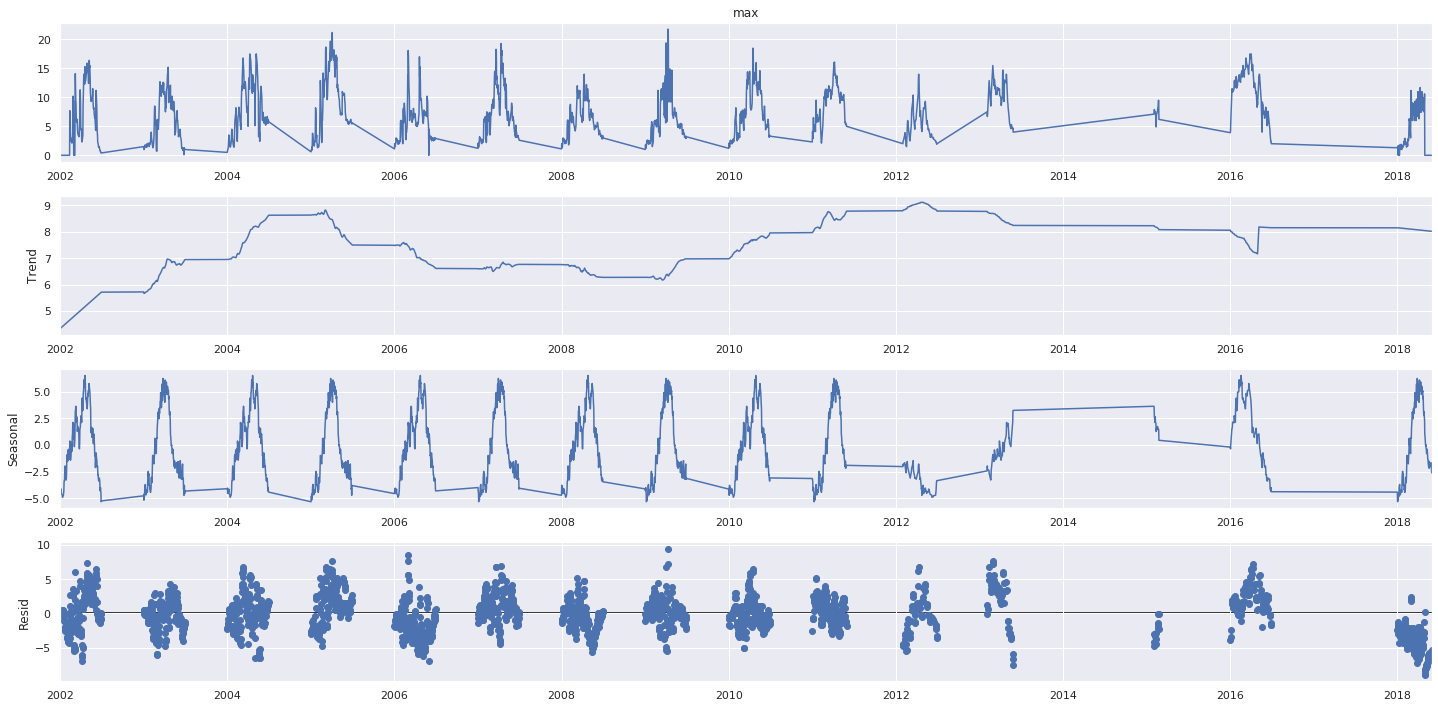

In [83]:
p = seasonal_decompose(df.loc[df['code'] == 'LOCTHUAN', 'max'], model='additive', period=365, extrapolate_trend=365).plot()

The trend charts of these critical stations showed the salinization problem getting worse over the years

2. The rest of stations have only enough samples for monthly period. There are 4 moderate ones (Tien Thuy, Tan Thieng, Phuoc Long, and Mo Cay) with 2 years of samples while the others have just 1 year of sample. They all have gaps

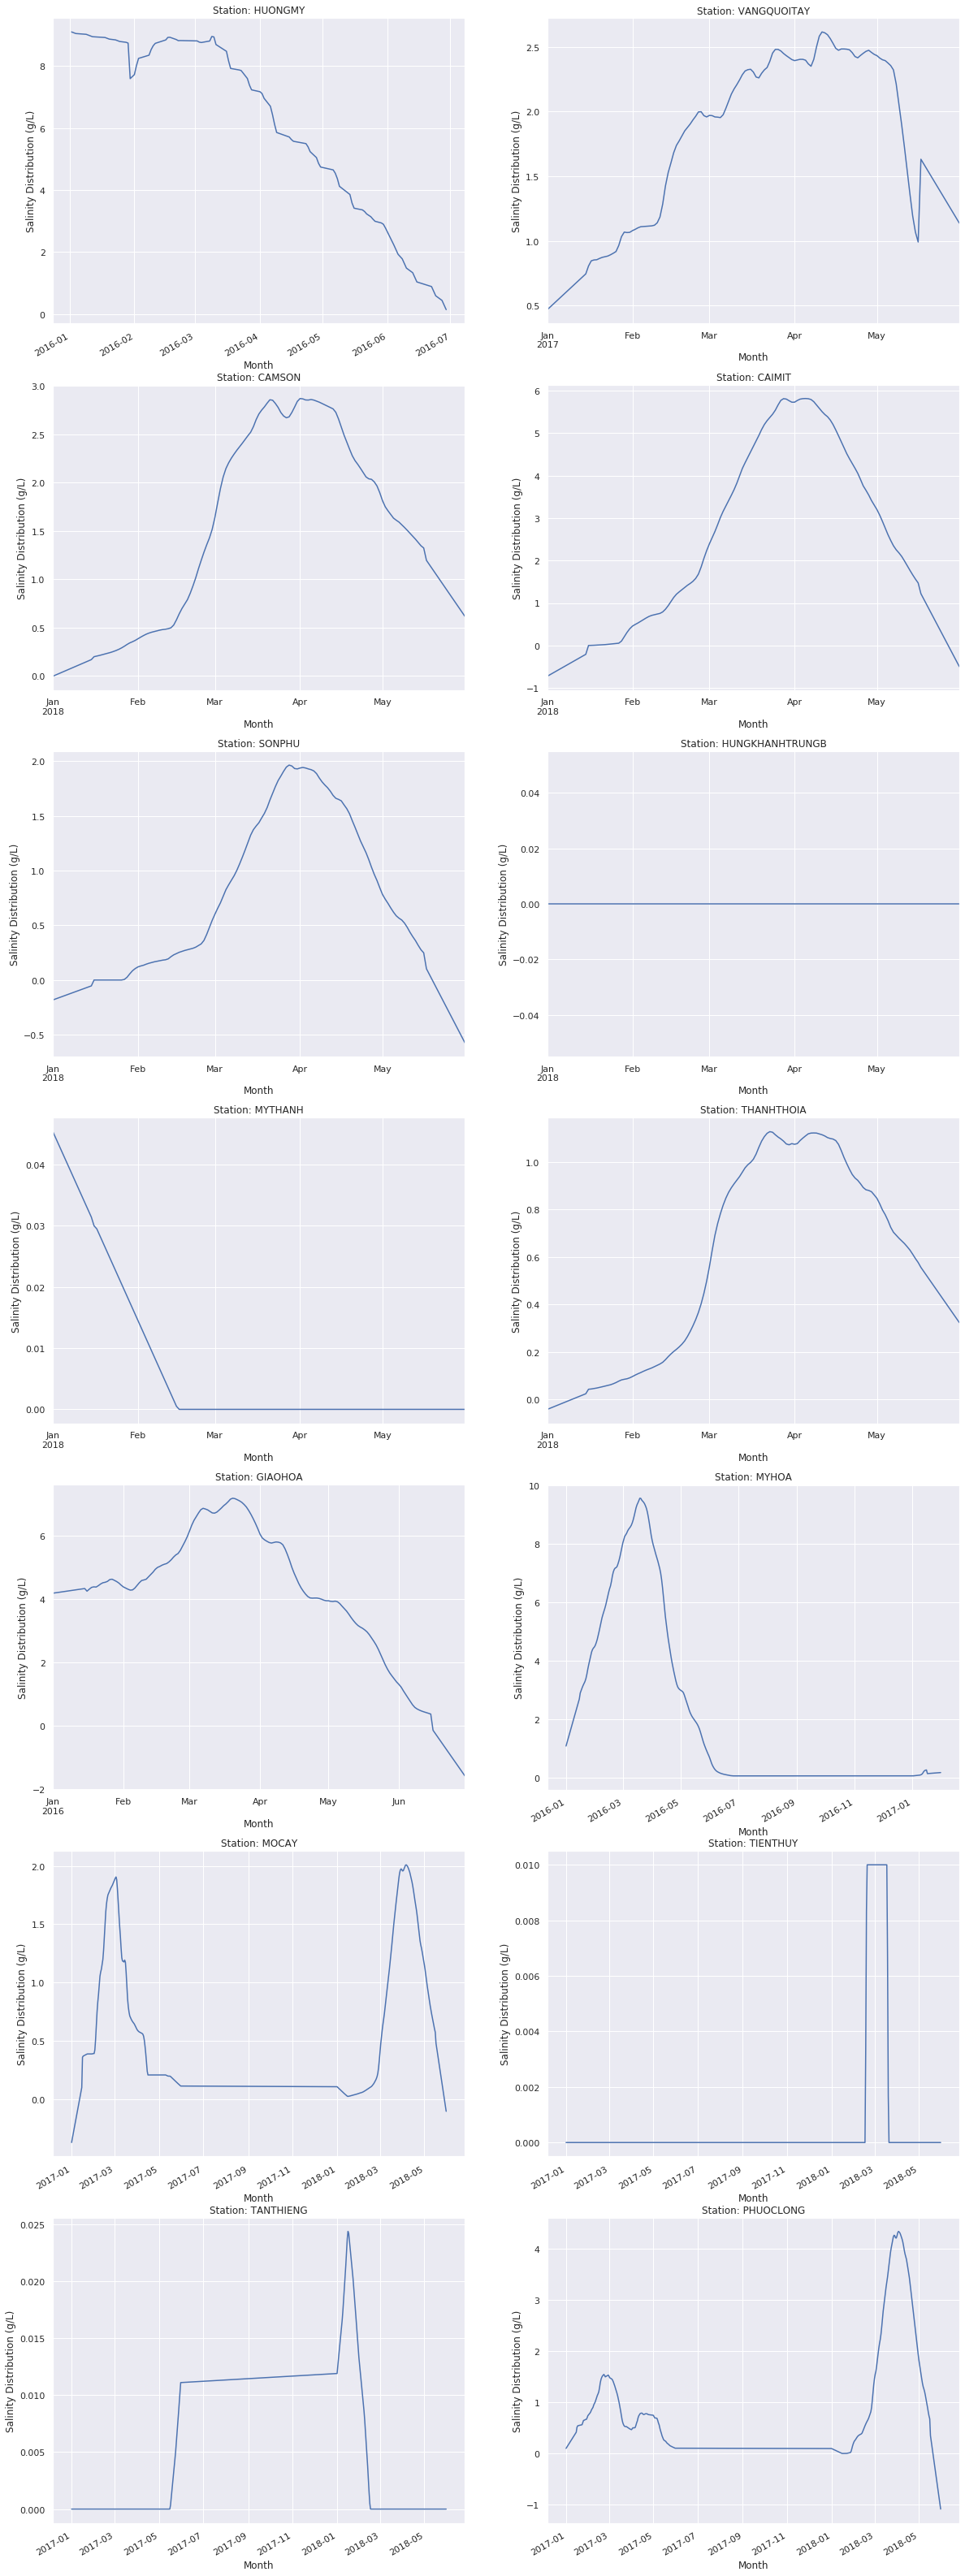

In [84]:
nrows = 7
ncols = 2

# reserve order to the array to iterate from station with lowest samples
station_codes = np.flip(station_count_df.index.to_numpy())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 9 * nrows))

for row in range(nrows):
    for col in range(ncols):
        ax = axes[row, col]
        station_code = station_codes[row * ncols + col]
        p = seasonal_decompose(df.loc[df['code'] == station_code, 'max'], model='additive', period=30, extrapolate_trend=30).trend.plot(ax=ax)
        
        ax.set_title(f'Station: {station_code}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Salinity Distribution (g/L)');

These stations samples should not be used in modeling

### Testing for Stationarity

In [85]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def adf_check(code, field):
    result = adfuller(df.loc[df['code'] == code, field])

    print(f'Augmented Dickey-Fuller Test of Station {code} on field {field}:')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    
    if result[1] <= 0.05:
        print(f'{field} of station {code} is stationary!!!')
    else:
        print(f'{field} of station {code} is NON-STATIONARY :(')

In [86]:
break_line = 80 * '-'

for station in station_count_df.index.to_numpy():
    print(break_line)
    adf_check(station, 'min')
    print(break_line)
    adf_check(station, 'max')

--------------------------------------------------------------------------------
Augmented Dickey-Fuller Test of Station SONDOC on field min:
ADF Test Statistic: -5.2243869089088015
p-value: 7.838168740516607e-06
#Lags Used: 4
Number of Observations Used: 2266
min of station SONDOC is stationary!!!
--------------------------------------------------------------------------------
Augmented Dickey-Fuller Test of Station SONDOC on field max:
ADF Test Statistic: -4.800213247455669
p-value: 5.433487377617455e-05
#Lags Used: 21
Number of Observations Used: 2249
max of station SONDOC is stationary!!!
--------------------------------------------------------------------------------
Augmented Dickey-Fuller Test of Station LOCTHUAN on field min:
ADF Test Statistic: -5.240320319373414
p-value: 7.269928943716729e-06
#Lags Used: 12
Number of Observations Used: 2141
min of station LOCTHUAN is stationary!!!
--------------------------------------------------------------------------------
Augmented Dicke

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


#### All 5 critical stations have stationary samples!!!
No need to take any differencing to remove the trend parts  
The other stations samples which are not stationary due to lack of samples

### Autocorrelation and Partial Autocorrelation

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [88]:
def plot_autocorrelation(plot_func, title):
    nrows = 5
    ncols = 2

    station_codes = station_count_df.index.to_numpy()

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 9 * nrows))

    for row in range(nrows):
        station_code = station_codes[row]

        ax = axes[row, 0]
        fig = plot_func(df.loc[df['code'] == station_code, 'min'], ax=ax, title=f'{title} - {station_code} on min')

        ax = axes[row, 1]
        fig = plot_func(df.loc[df['code'] == station_code, 'max'], ax=ax, title=f'{title} - {station_code} on max')

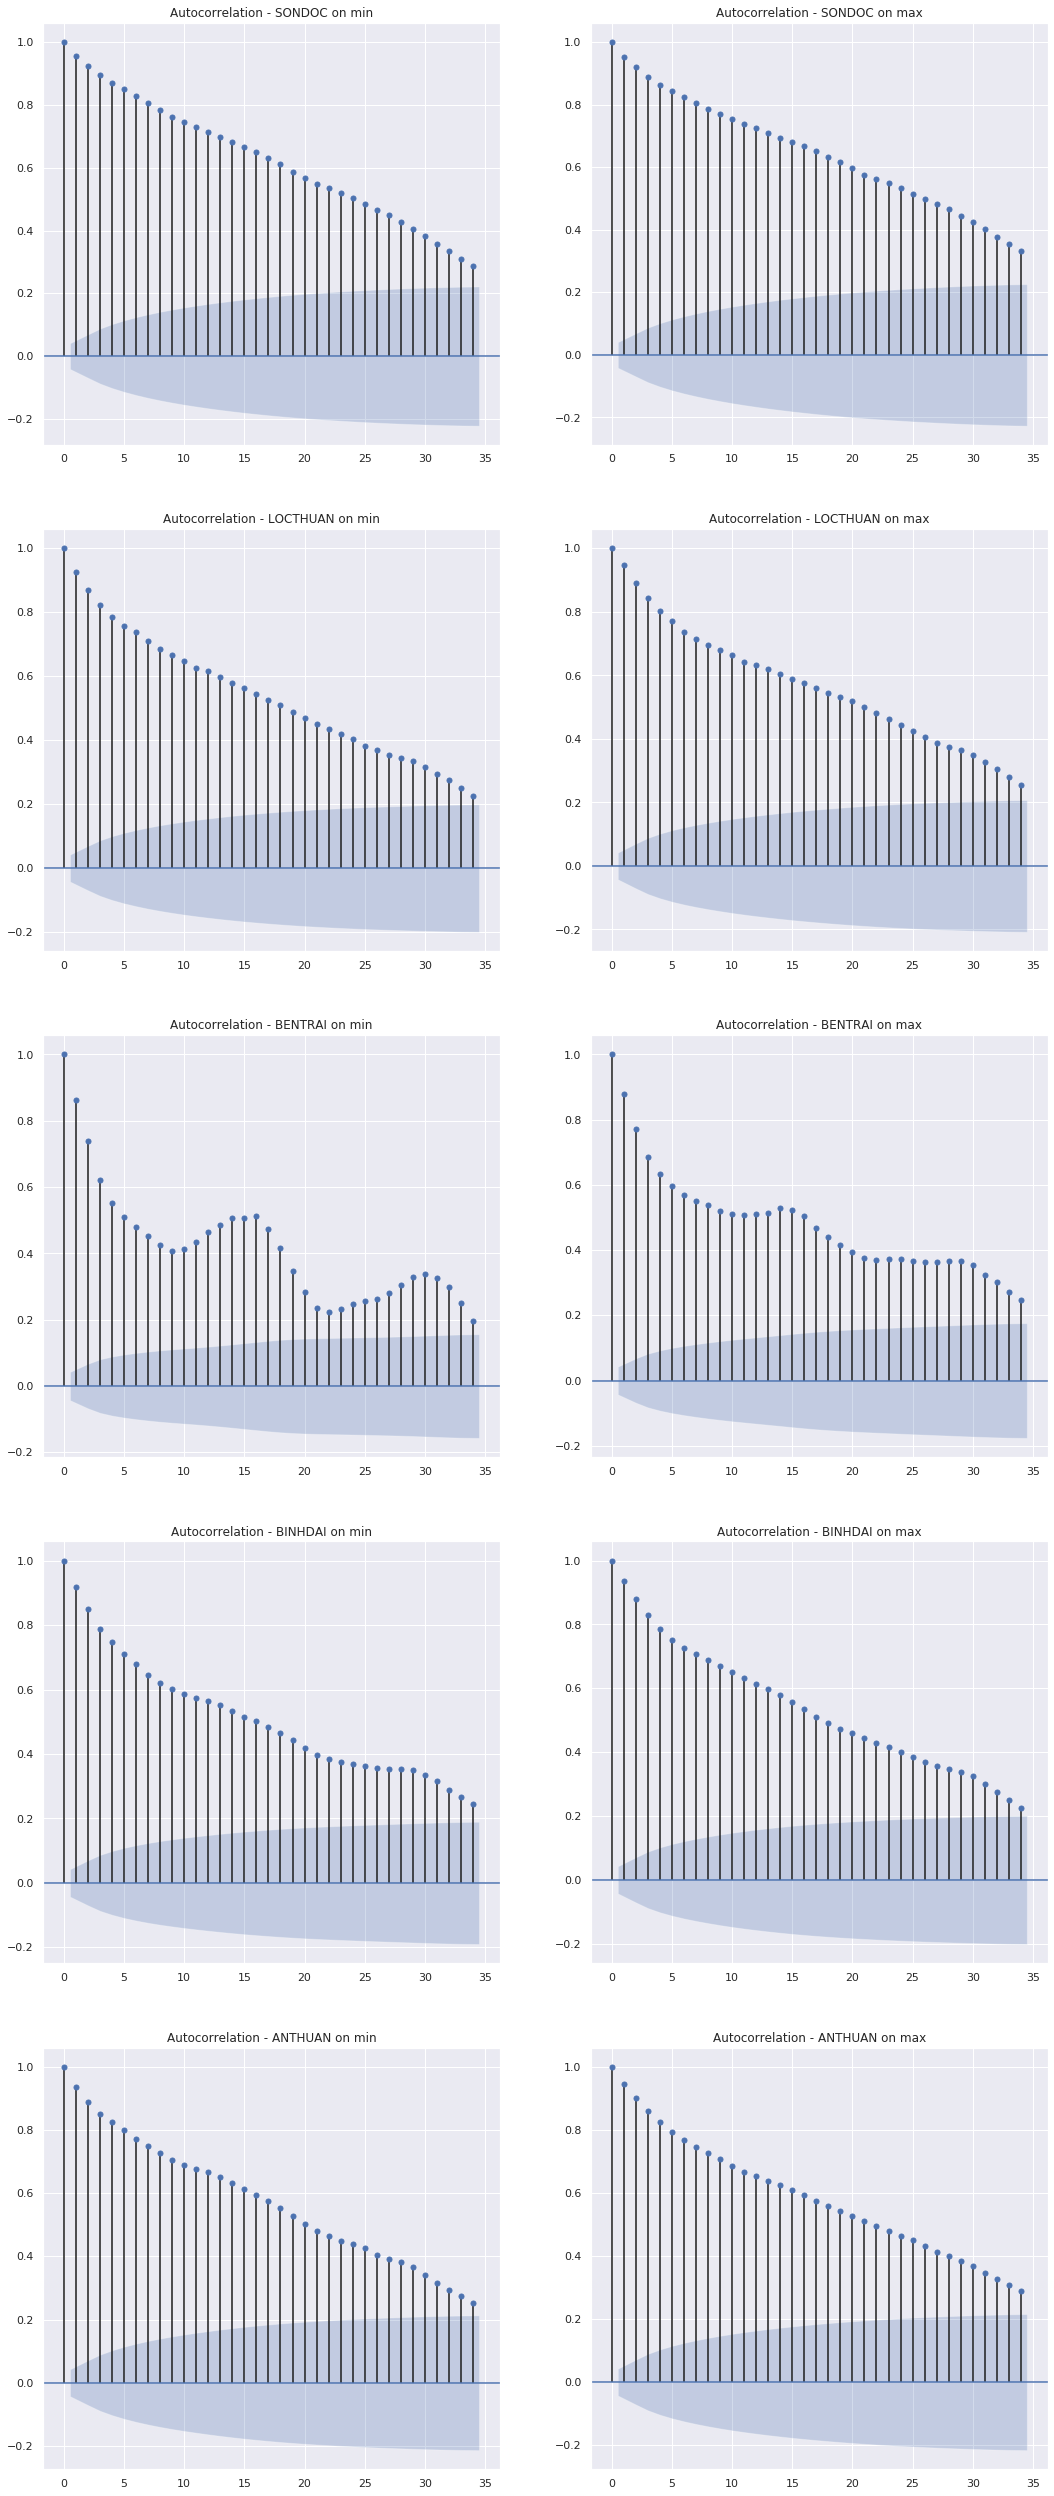

In [89]:
# Autocorrelation
plot_autocorrelation(plot_acf, 'Autocorrelation')

#### Both min and max values from 5 critical stations have gradual decline in their autocorelation plots  
Use AR (Auto Regressive) or MA (Moving Average) components for the ARIMA model?

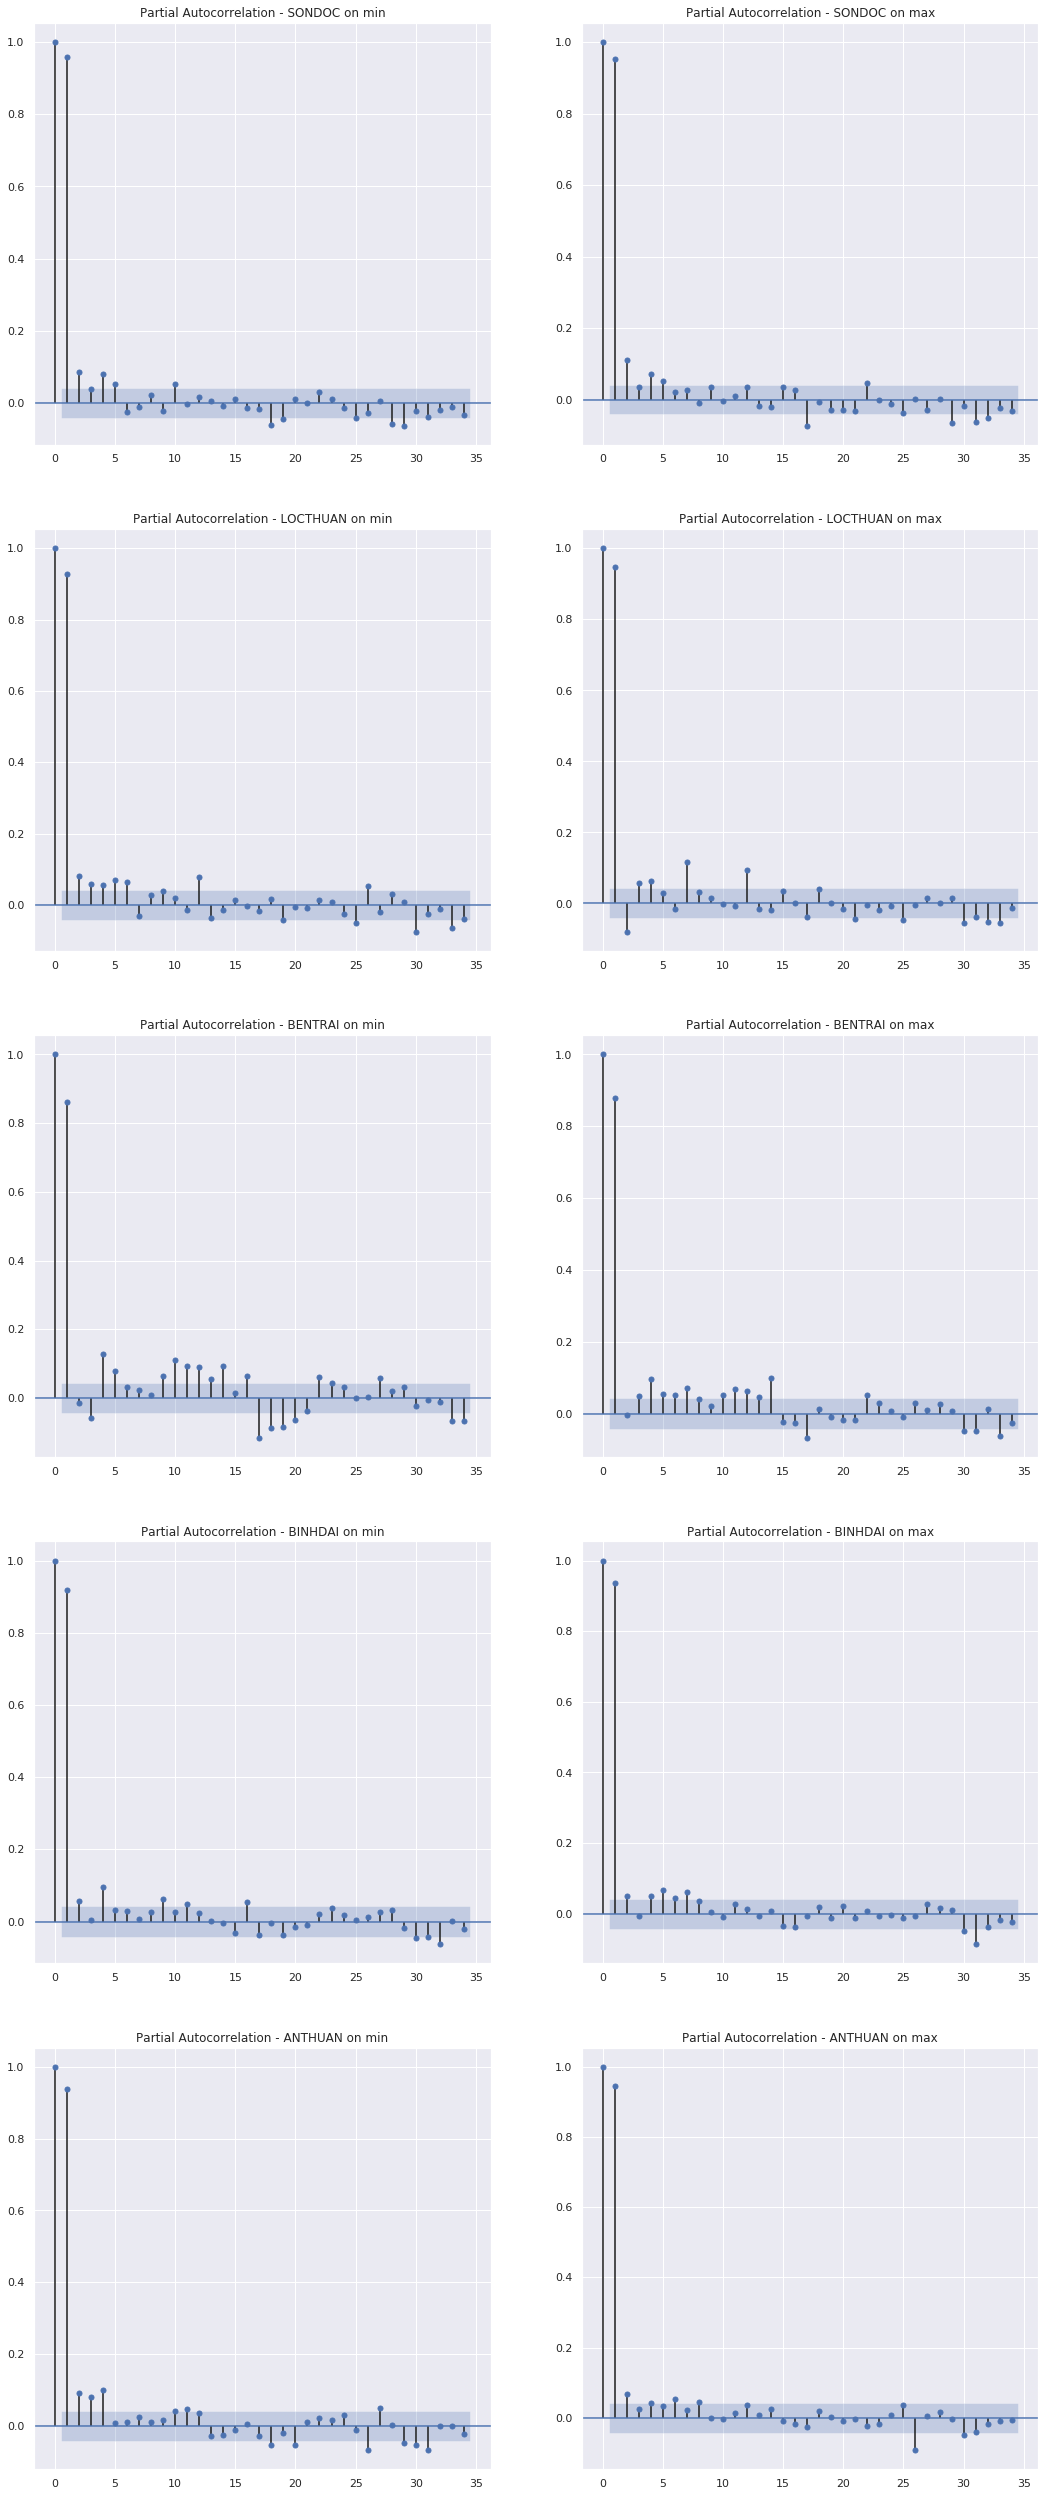

In [90]:
# Partial Autocorrelation
plot_autocorrelation(plot_pacf, 'Partial Autocorrelation')

#### Both min and max values from 5 critical stations have sharp drop in their partial autocorelation plots  
Use Auto-Regression after the K number of lags in the ARIMA models (AR component)

## Samples for other stations could be used since they also have advantage due to lack of longer historical data. Further explorations are needed to pick the right prediction models  
See 'Principles and risks of forecasting' by Robert Nau  
Additional reading is preferable: https://people.duke.edu/~rnau/411home.htm